In [52]:
import numpy as np
import scipy.io
import tensorflow as tf
from tensorflow import keras
from keras.models import load_model
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters

%matplotlib inline
%config InlineBackend.figure_format='retina'
import os
os.environ["PATH"] += os.pathsep + "C:/Graphviz/bin"

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 22, 10

RANDOM_SEED = 42
TIME_STEPS = 100

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [2]:
# Load the time series data
bth = scipy.io.loadmat('Data/health_bearing/H-A-1.mat')
data = bth["Channel_1"]

# Normalize the data
data_mean = np.mean(data, axis=0)
data_std = np.std(data, axis=0)
data = (data - data_mean) / data_std

# Split the data into training and validation sets
train_data = data[:1500000]
val_data = data[1500000:]

In [22]:
# Define the model architecture
model = keras.Sequential([
    keras.layers.GRU(64, return_sequences=True, input_shape=(None, 1)),
    keras.layers.Dropout(0.2),
    keras.layers.GRU(32, return_sequences=True),
    keras.layers.Dropout(0.2),
    keras.layers.TimeDistributed(keras.layers.Dense(1))
])

# Compile the model
model.compile(optimizer=keras.optimizers.Adam(1e-4), loss='mae')

# Train the model
history = model.fit(
    train_data[..., np.newaxis],
    train_data[..., np.newaxis],
    batch_size=64,
    epochs=10,
    validation_data=(val_data[..., np.newaxis], val_data[..., np.newaxis])
)
model.save("gru_64_.h5")


Epoch 1/10
23438/23438 [==============================] - 541s 23ms/step - loss: 0.0737 - val_loss: 0.0072
Epoch 2/10
23438/23438 [==============================] - 558s 24ms/step - loss: 0.0639 - val_loss: 0.0156
Epoch 3/10
23438/23438 [==============================] - 217s 9ms/step - loss: 0.0636 - val_loss: 0.0107
Epoch 4/10
23438/23438 [==============================] - 207s 9ms/step - loss: 0.0635 - val_loss: 0.0125
Epoch 5/10
23438/23438 [==============================] - 222s 9ms/step - loss: 0.0635 - val_loss: 0.0073
Epoch 6/10
23438/23438 [==============================] - 215s 9ms/step - loss: 0.0634 - val_loss: 0.0140
Epoch 7/10
23438/23438 [==============================] - 213s 9ms/step - loss: 0.0634 - val_loss: 0.0159
Epoch 8/10
23438/23438 [==============================] - 230s 10ms/step - loss: 0.0633 - val_loss: 0.0135
Epoch 9/10
23438/23438 [==============================] - 220s 9ms/step - loss: 0.0634 - val_loss: 0.0158
Epoch 10/10
23438/23438 [==================

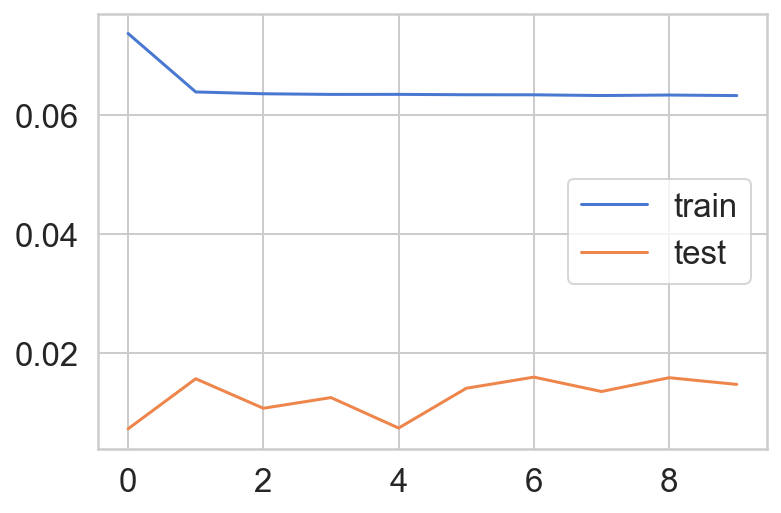

In [23]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

In [35]:
model = load_model("gru_2m_v2.h5")
model_cnn = load_model("model_bearing.h5")

In [51]:
def create_dataset_cnn(X, time_steps=1):
    Xs = []
    for i in range(len(X) - time_steps):
        v = X[i:(i + time_steps)]
        Xs.append(v)        
        # ys.append(y[i + time_steps])
    return np.array(Xs)#, np.array(ys)

In [38]:
bth = scipy.io.loadmat('Data/health_bearing/H-A-3.mat')
data = bth["Channel_1"]

In [39]:
reconstructions = model.predict(data[..., np.newaxis])
mae = np.mean(np.abs(reconstructions-data[..., np.newaxis]), axis=1)

62500/62500 [==============================] - 160s 3ms/step


C:\Users\PC\AppData\Local\Temp/ipykernel_20212/1831549769.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mae, bins=100, kde=True)


<AxesSubplot: ylabel='Density'>

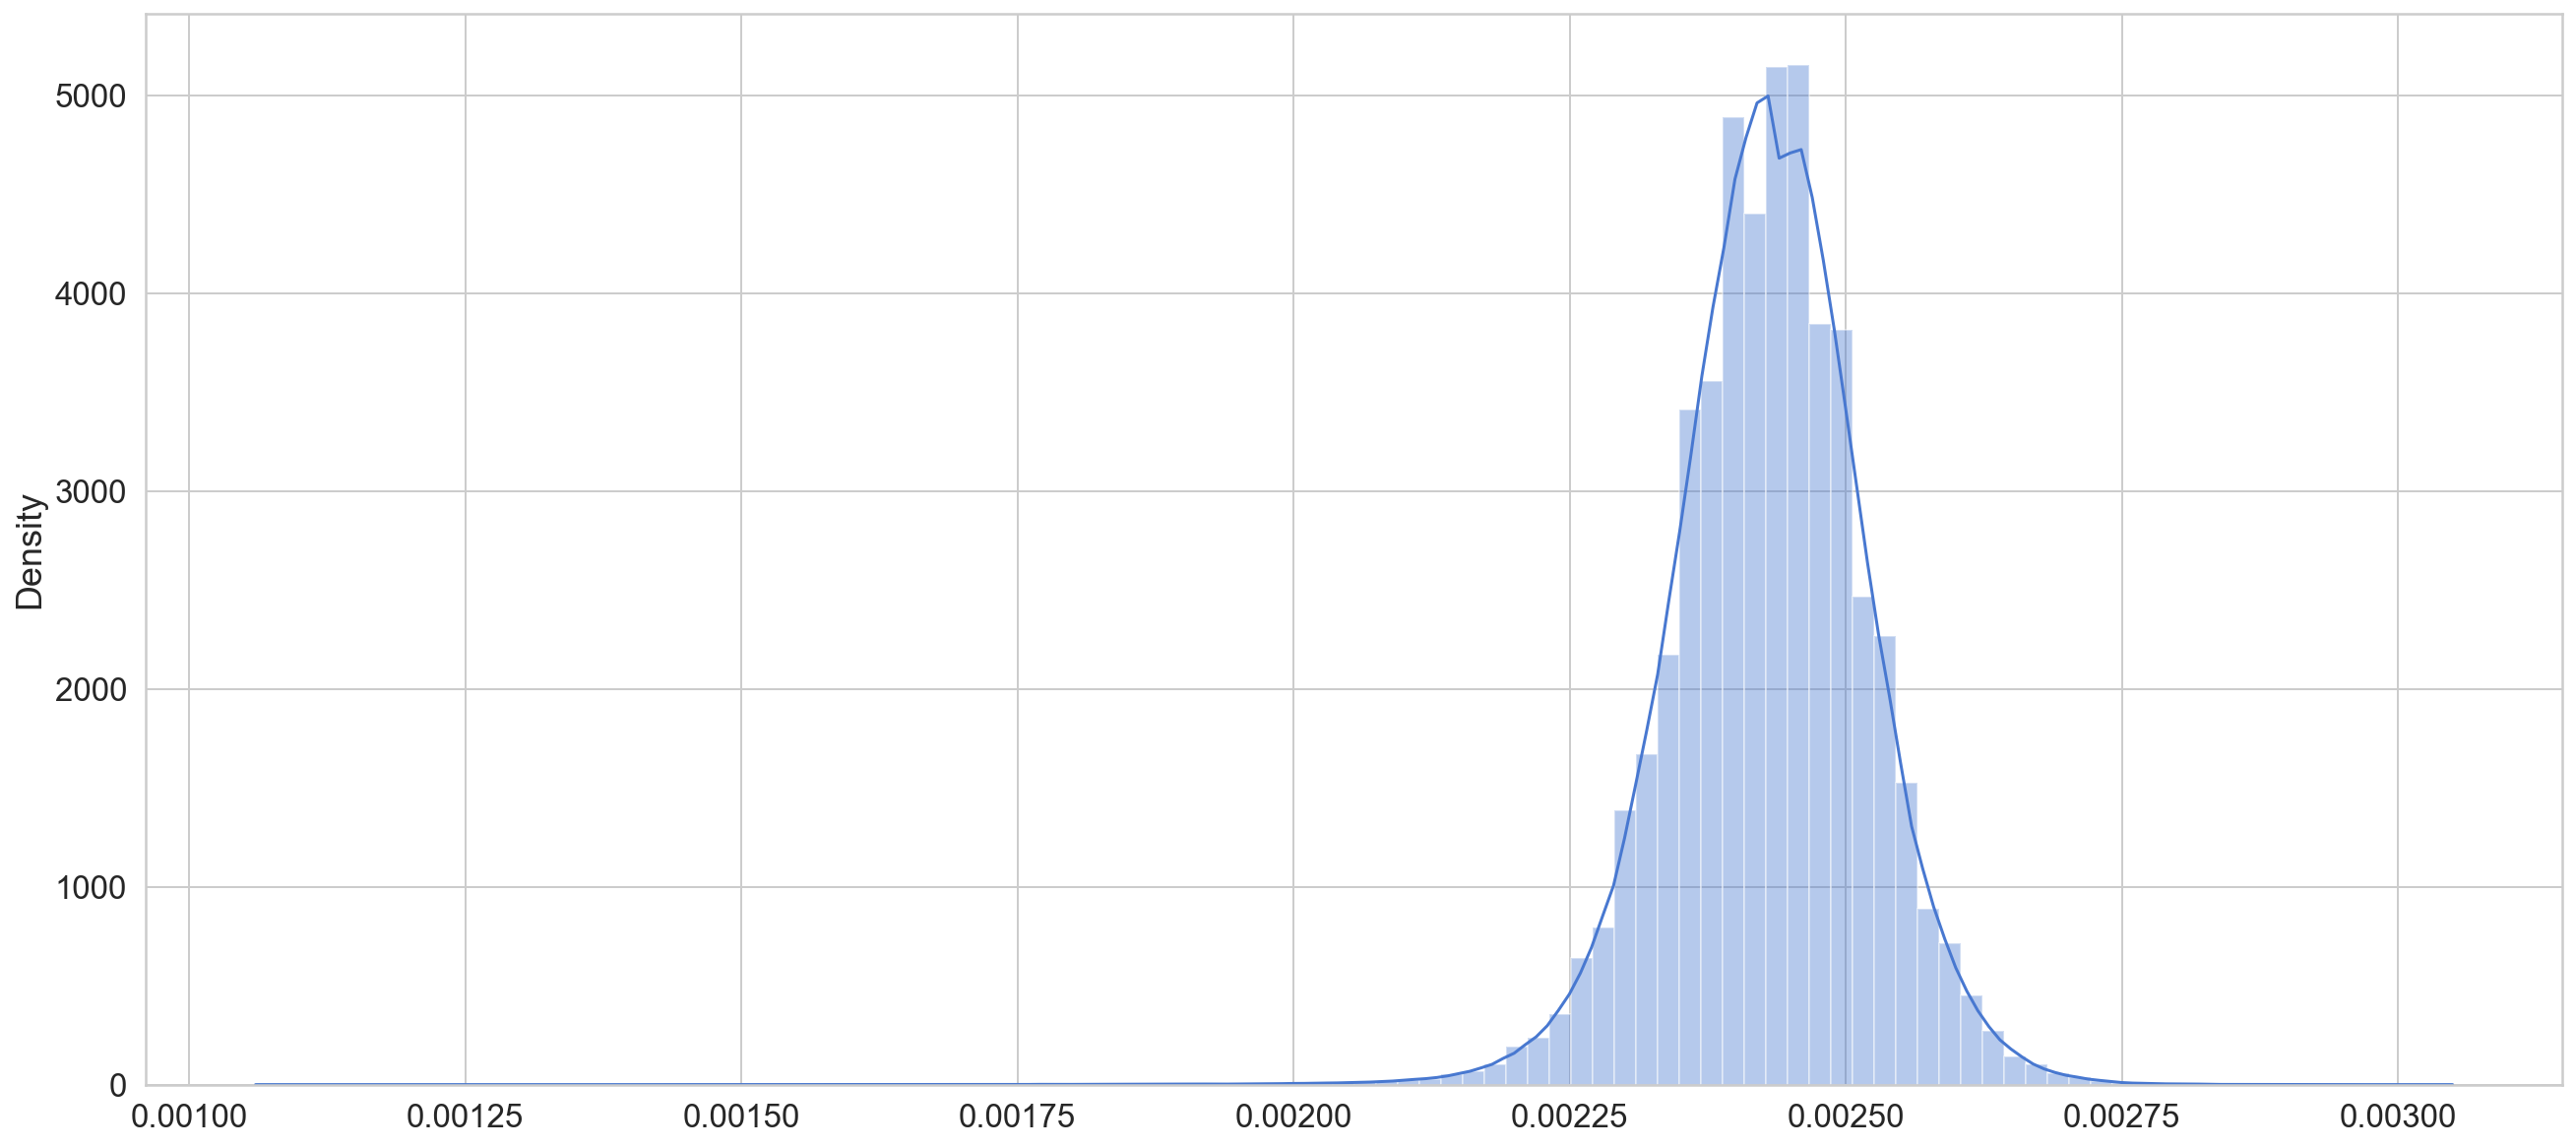

In [40]:
import seaborn as sns
sns.distplot(mae, bins=100, kde=True)

In [41]:
THRESHOLD_HIGH = np.mean(mae) + 4*np.std(mae)
THRESHOLD_LOW = np.mean(mae) - 4*np.std(mae)
print(THRESHOLD_HIGH)
print(THRESHOLD_LOW)

0.002778873660335934
0.002081476291196994


### Test 1: Inner Fault

In [42]:
bth1 = scipy.io.loadmat('Data/health_bearing/H-A-3.mat')
kbth = scipy.io.loadmat('Data/inner_fault/I-A-1.mat')
data2 = bth1["Channel_1"]
data3 = kbth["Channel_1"]
test = data2[:3000]
test[1000:1050] = data3[1000:1050]

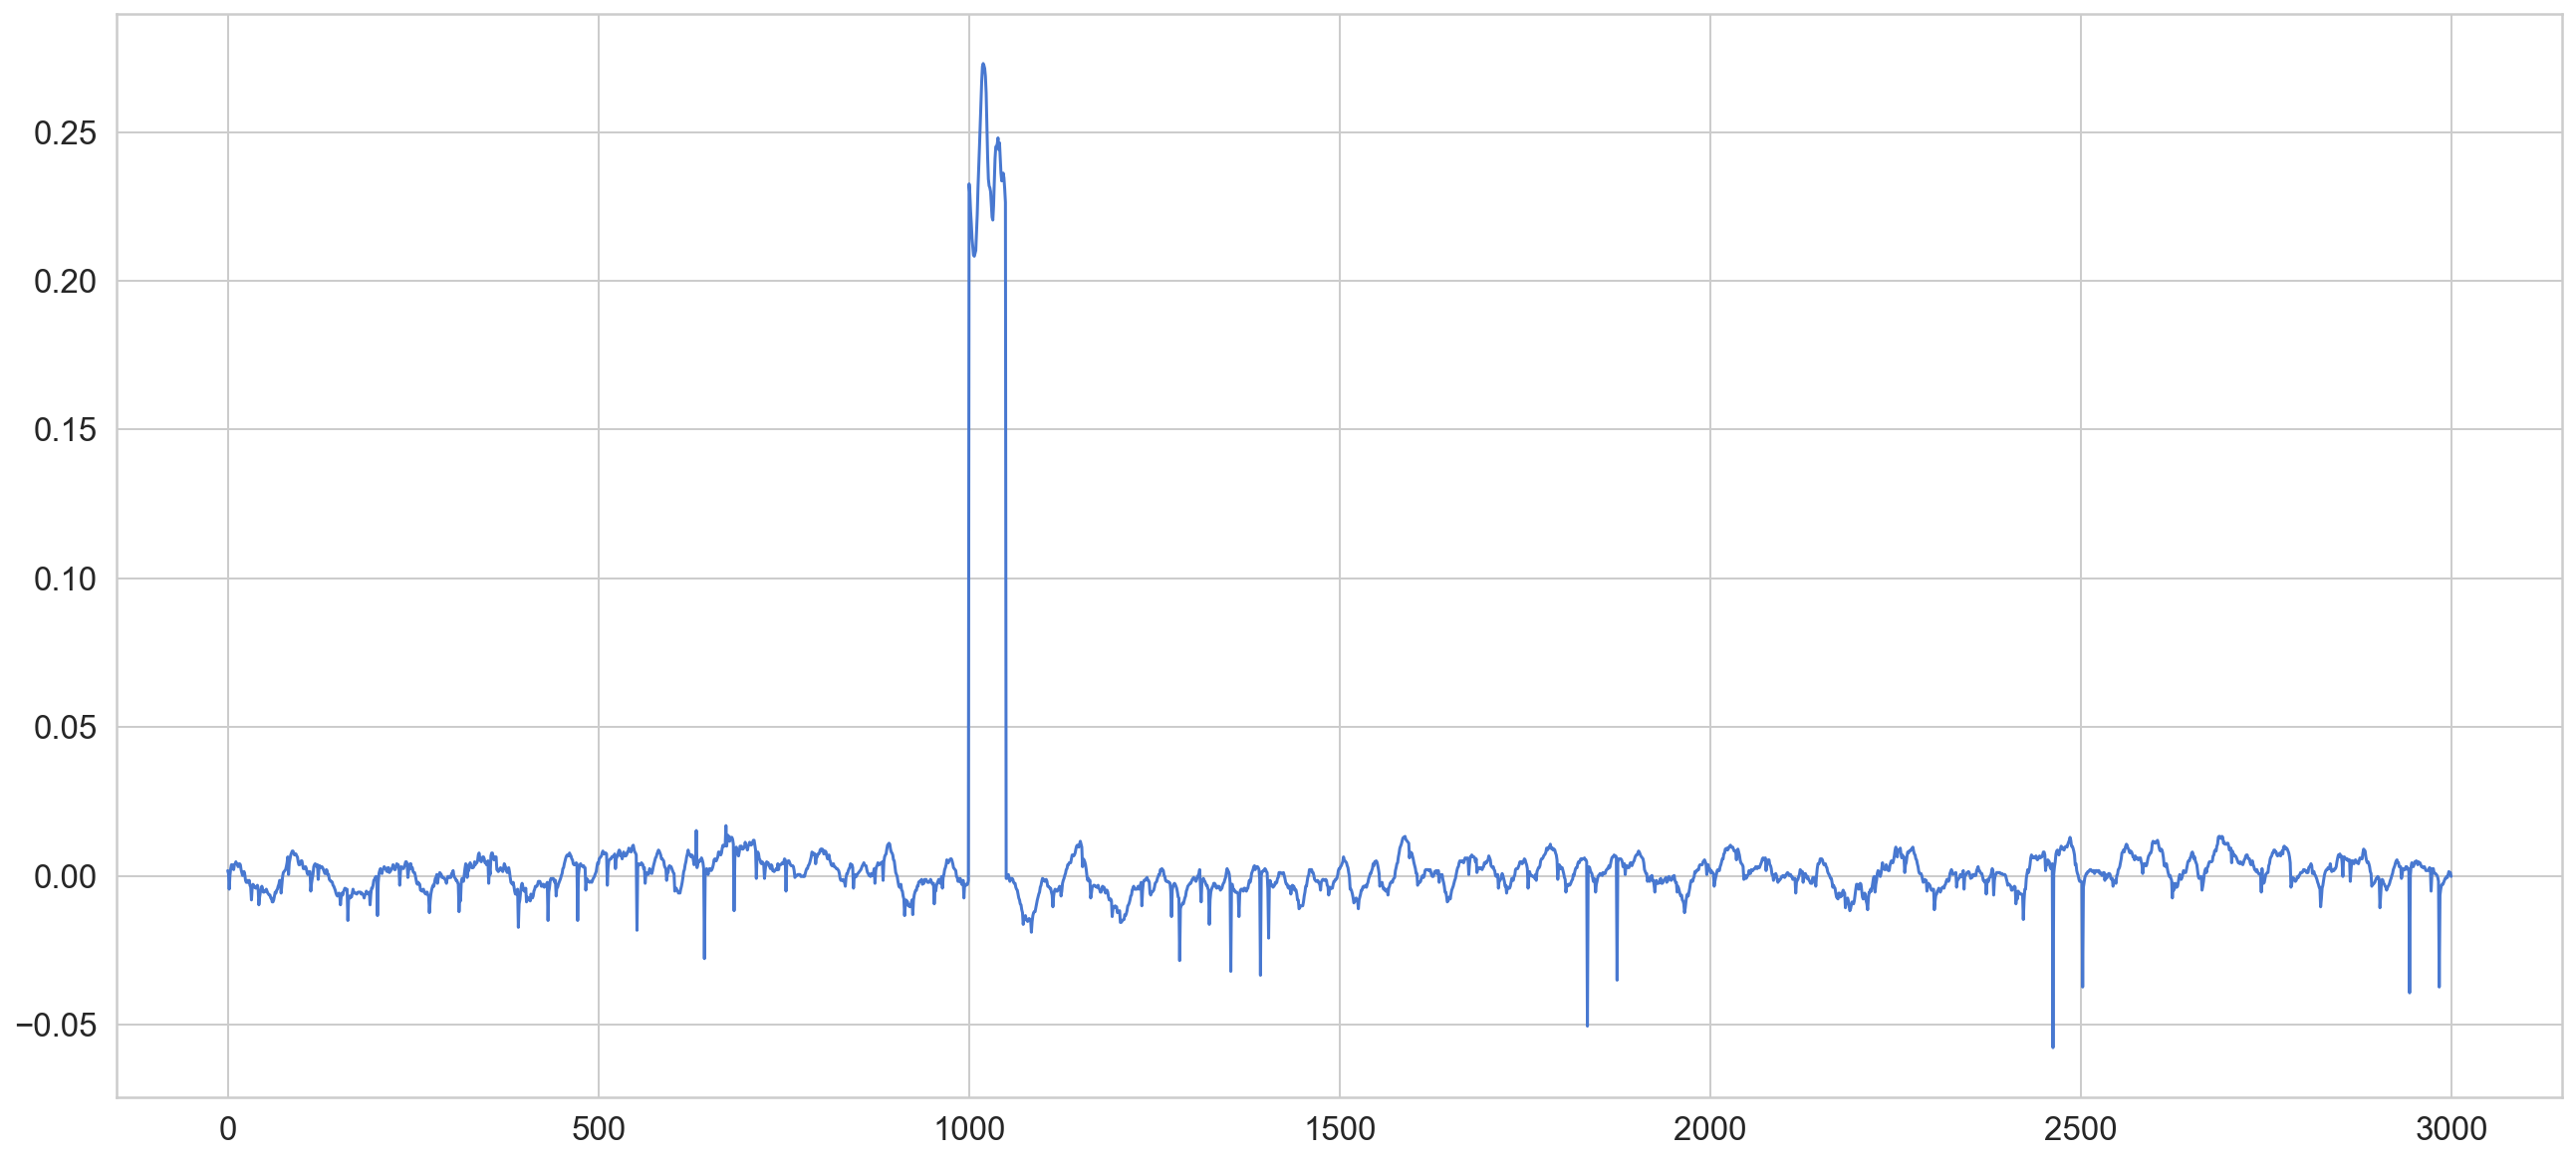

In [43]:
plt.plot(test)

91/91 [==============================] - 2s 6ms/step
(array([ 904,  905,  906,  907,  908,  909,  910,  911,  912,  913,  914,
        915,  916,  917,  918,  919,  920,  921,  922,  923,  924,  925,
        926,  927,  928,  929,  930,  931,  932,  933,  934,  935,  936,
        937,  938,  939,  940,  941,  942,  943,  944,  945,  946,  947,
        948,  949,  950,  951,  952,  953,  954,  955,  956,  957,  958,
        959,  960,  961,  962,  963,  964,  965,  966,  967,  968,  969,
        970,  971,  972,  973,  974,  975,  976,  977,  978,  979,  980,
        981,  982,  983,  984,  985,  986,  987,  988,  989,  990,  991,
        992,  993,  994,  995,  996,  997,  998,  999, 1000, 1001, 1002,
       1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013,
       1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024,
       1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035,
       1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044, 1045, 104

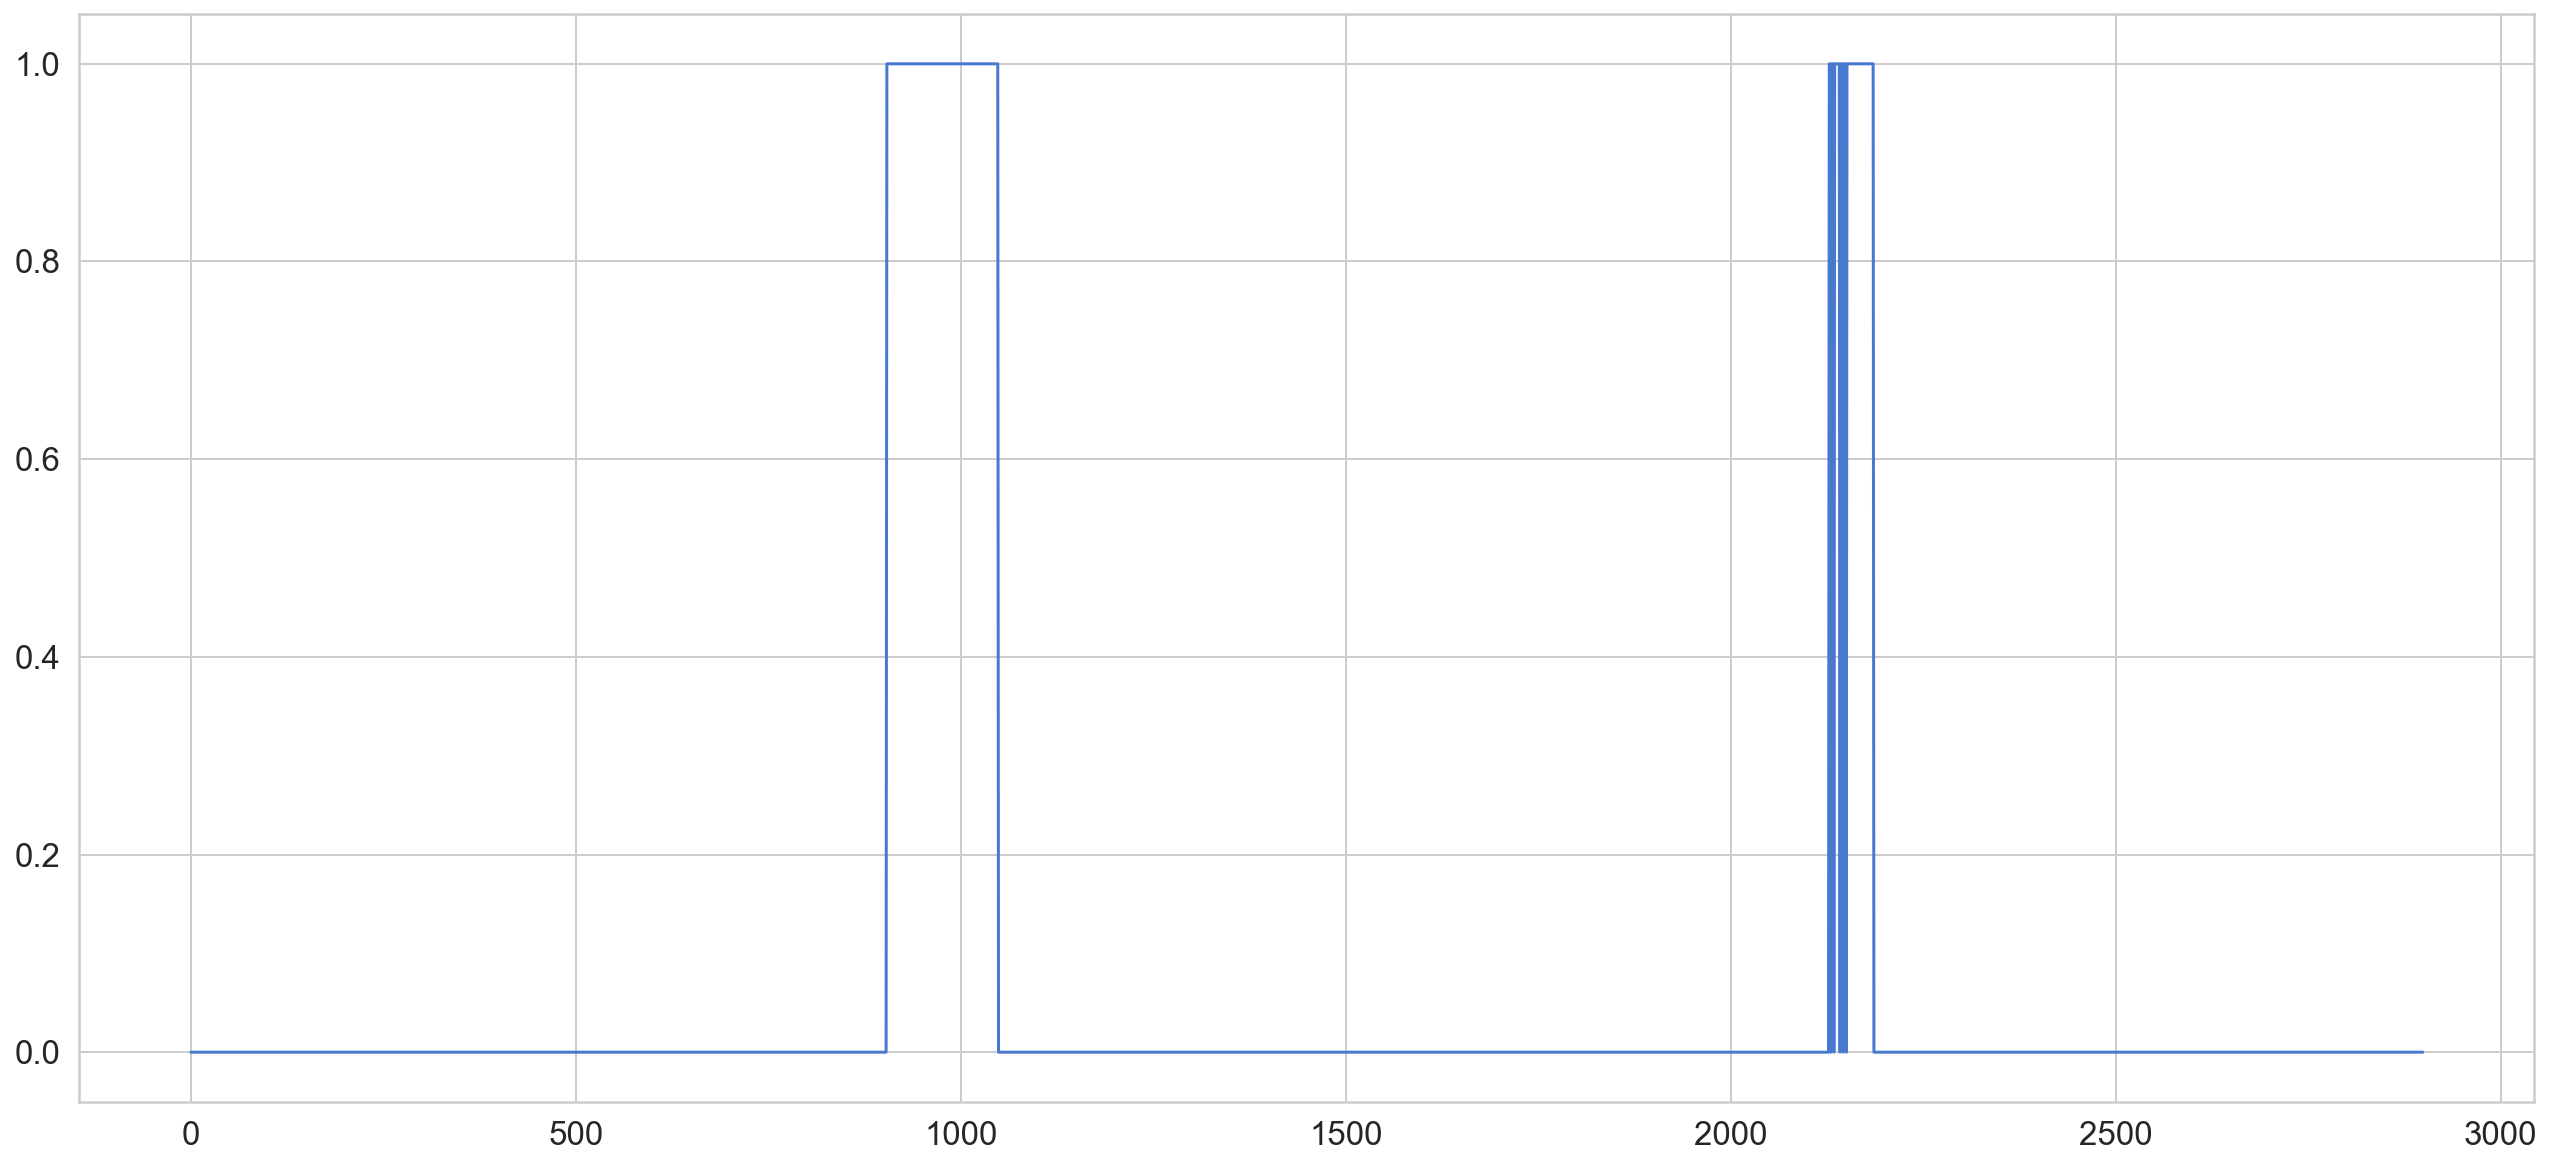

In [53]:
test_cnn = create_dataset_cnn(test,TIME_STEPS)
pre = model_cnn.predict(test_cnn)
re = pre.argmax(axis = 1)
print(np.where(re==1))
plt.plot(re)

In [54]:
reconstructions_test = model.predict(test[..., np.newaxis])
test_mae = np.mean(np.abs(reconstructions_test - test[..., np.newaxis]), axis=1)

94/94 [==============================] - 1s 4ms/step


In [56]:
test_df = pd.DataFrame(index = np.arange(len(test_mae)-TIME_STEPS))
test_df["loss"] = test_mae[:len(test)-TIME_STEPS]
test_df["cnn_predict"] = re
test_df["higher_threshold"] = THRESHOLD_HIGH
test_df["lower_threshold"] = THRESHOLD_LOW
test_df["anomaly"] = np.where(
    (test_df.loss > test_df.higher_threshold) | (test_df.loss < test_df.lower_threshold) & (test_df.cnn_predict == 1),
    True,
    False
)
test_df["signal"] = test[:len(test)-TIME_STEPS]

In [57]:
test_df

,loss,cnn_predict,higher_threshold,lower_threshold,anomaly,signal
0,0.002449,0,0.002779,0.002081,False,0.001747
1,0.002438,0,0.002779,0.002081,False,0.000760
2,0.002381,0,0.002779,0.002081,False,-0.004501
3,0.002431,0,0.002779,0.002081,False,0.000102
4,0.002456,0,0.002779,0.002081,False,0.002404
...,...,...,...,...,...,...
2895,0.002403,0,0.002779,0.002081,False,-0.002528
2896,0.002406,0,0.002779,0.002081,False,-0.002199
2897,0.002413,0,0.002779,0.002081,False,-0.001542
2898,0.002420,0,0.002779,0.002081,False,-0.000884


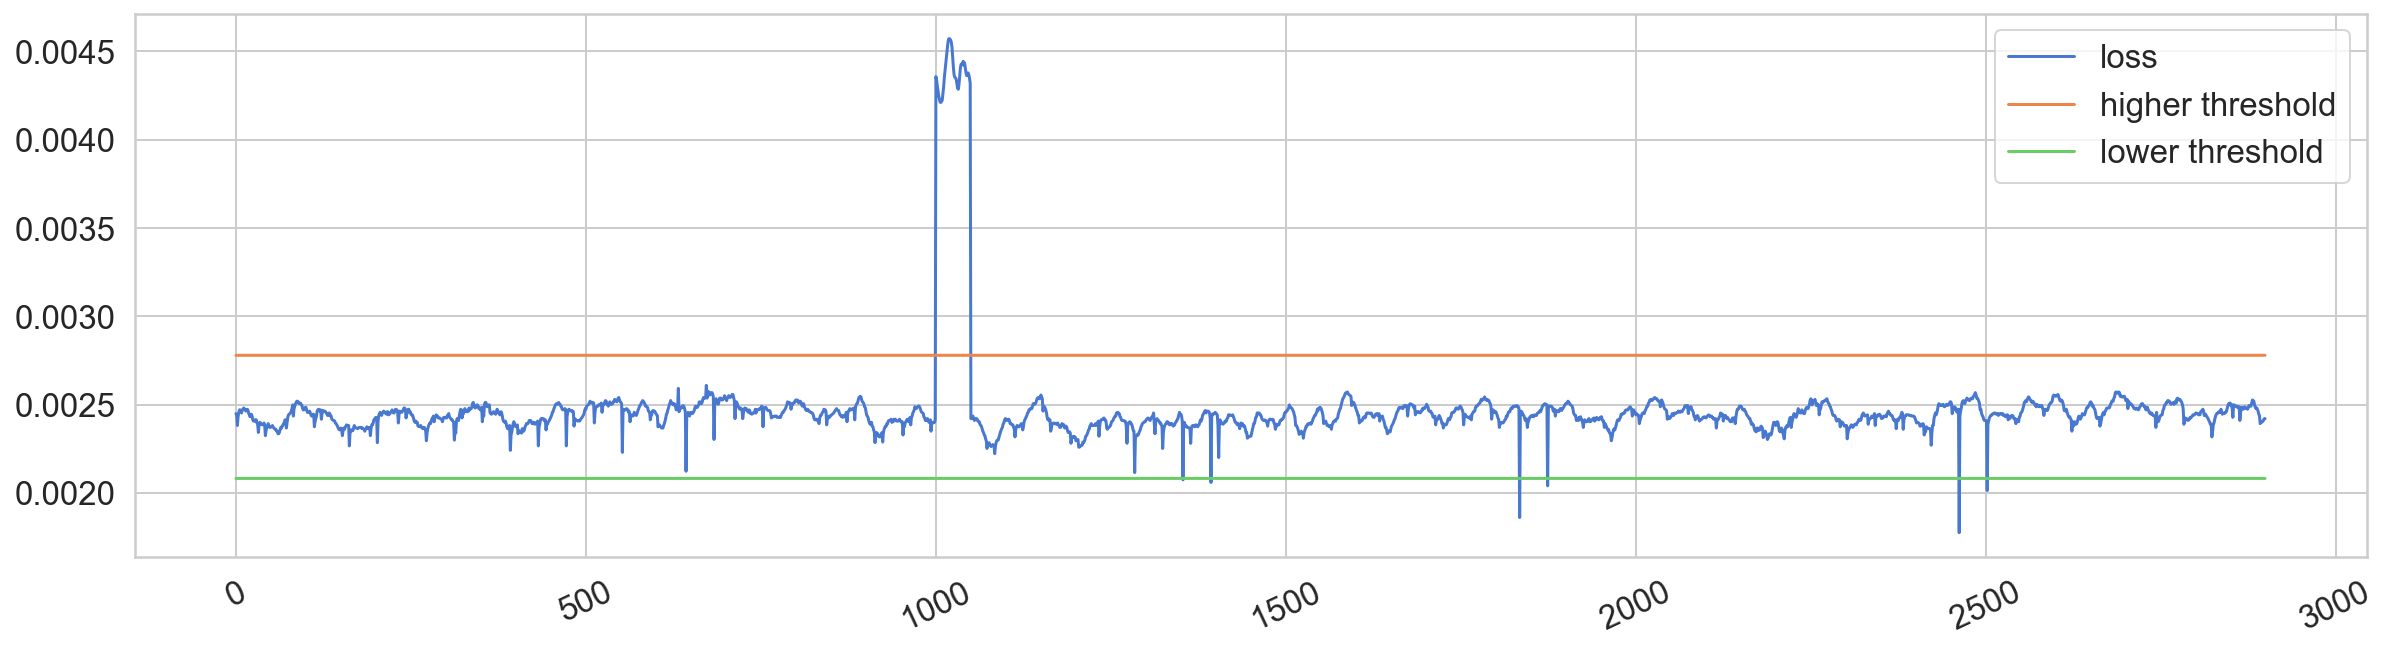

In [58]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.plot(test_df.index, test_df.loss, label='loss')
plt.plot(test_df.index, test_df.higher_threshold, label='higher threshold')
plt.plot(test_df.index, test_df.lower_threshold, label='lower threshold')
plt.xticks(rotation=25)
plt.legend()

In [59]:
anomalies = test_df[test_df.anomaly == True]
anomalies

,loss,cnn_predict,higher_threshold,lower_threshold,anomaly,signal
1000,0.004357,1,0.002779,0.002081,True,0.232597
1001,0.004338,1,0.002779,0.002081,True,0.229309
1002,0.004303,1,0.002779,0.002081,True,0.223390
1003,0.004278,1,0.002779,0.002081,True,0.219115
1004,0.004248,1,0.002779,0.002081,True,0.214182
1005,0.004231,1,0.002779,0.002081,True,0.211551
1006,0.004213,1,0.002779,0.002081,True,0.208592
1007,0.004211,1,0.002779,0.002081,True,0.208263
1008,0.004217,1,0.002779,0.002081,True,0.209249
1009,0.004223,1,0.002779,0.002081,True,0.210236


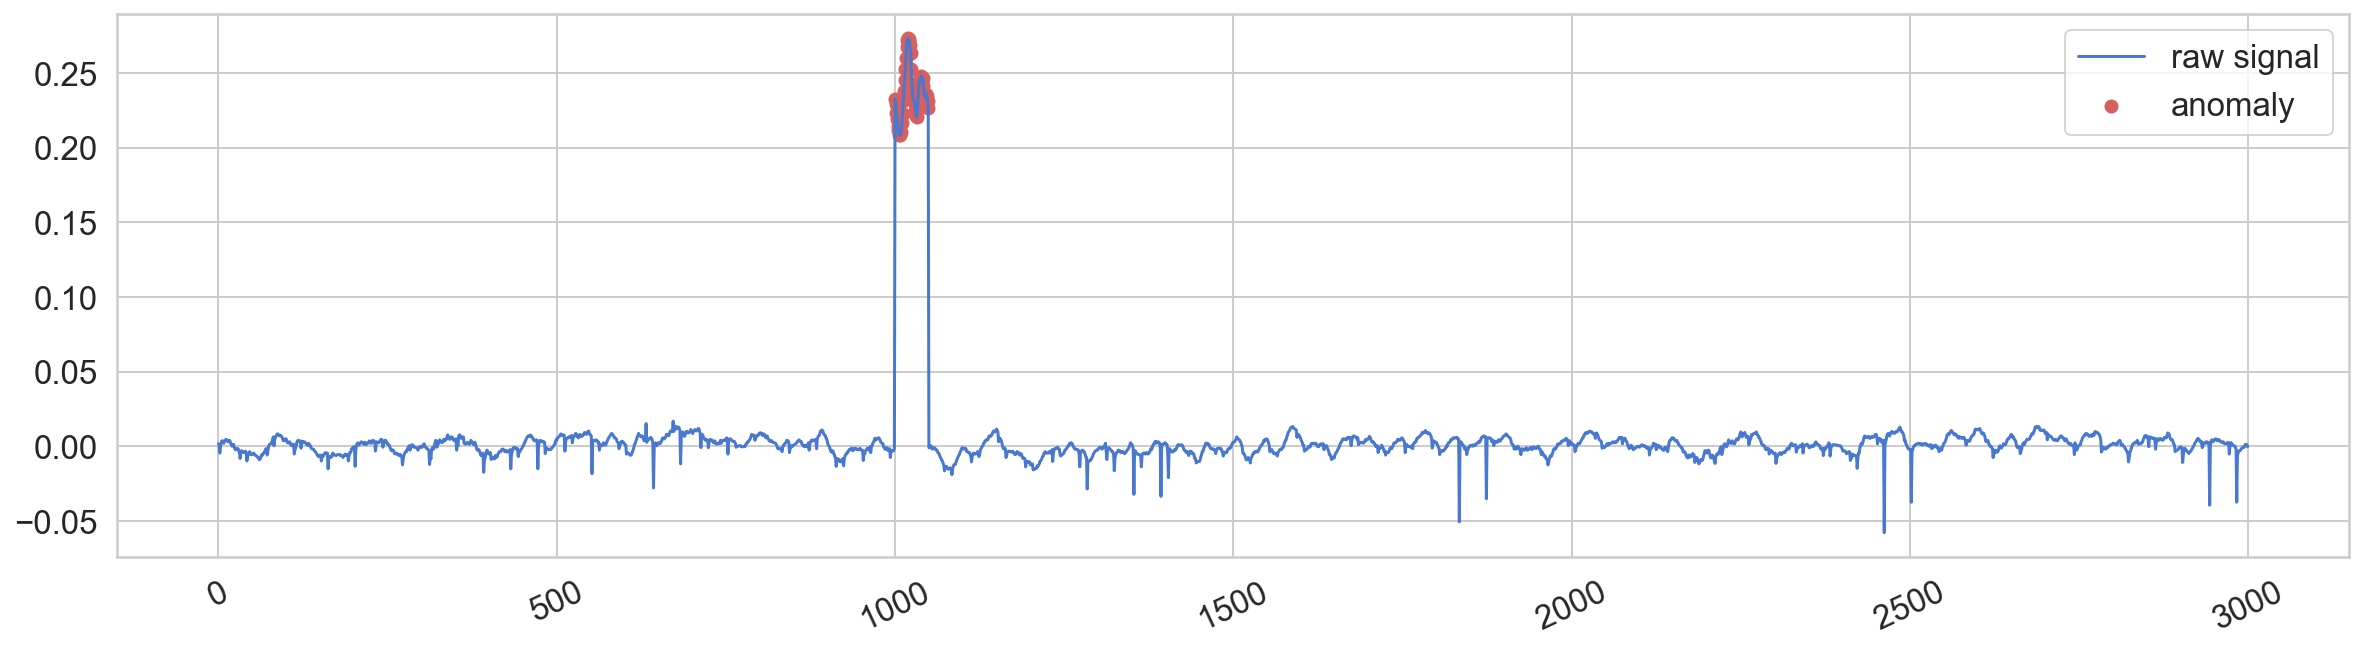

In [60]:
plt.figure(figsize=(20,5))
plt.plot(
  test, 
  label='raw signal'
)

plt.scatter(
  anomalies.index,
  anomalies.signal,
  color=sns.color_palette()[3],
  label='anomaly'
)
plt.xticks(rotation=25)
plt.legend()

### Test 2: Outer Fault

In [61]:
kbth = scipy.io.loadmat('Data/outer_fault/O-D-2.mat')

In [66]:
test = data2[35000:37000]
test[1000:1200] = kbth["Channel_1"][12000:12200]

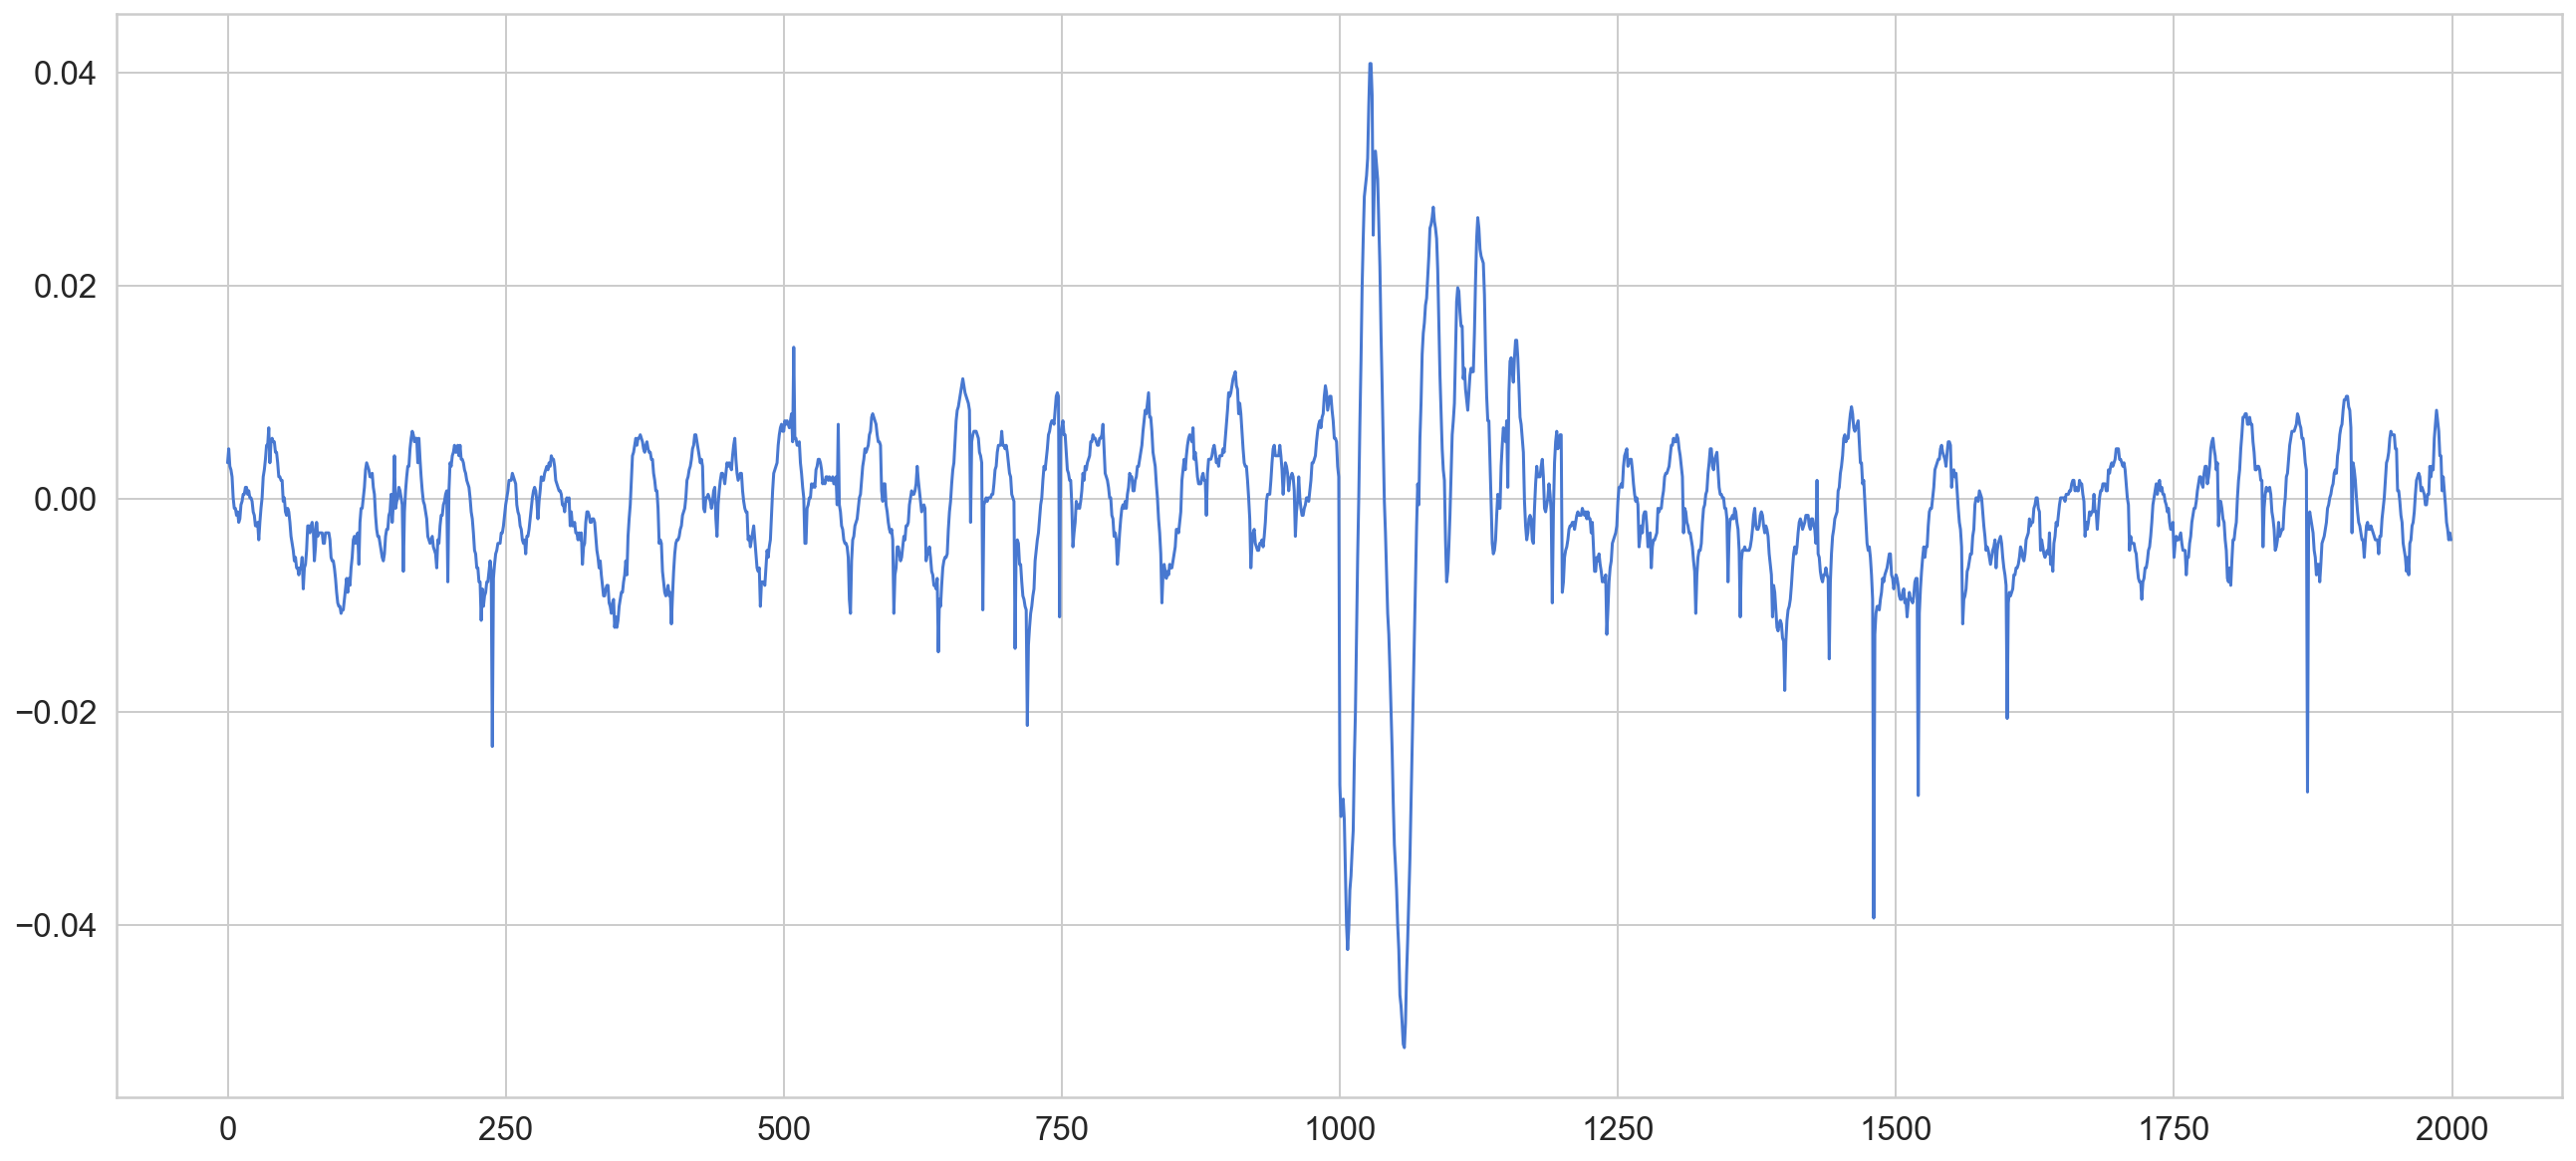

In [67]:
plt.plot(test)

60/60 [==============================] - 0s 8ms/step
(array([ 915,  916,  917,  918,  919,  920,  921,  922,  923,  924,  925,
        926,  927,  928,  929,  930,  931,  932,  933,  934,  935,  936,
        937,  938,  939,  940,  941,  942,  943,  944,  945,  946,  947,
        948,  949,  950,  951,  952,  953,  954,  955,  956,  957,  958,
        959,  960,  961,  962,  963,  964,  965,  966,  967,  968,  969,
        970,  971,  972,  973,  974,  975,  976,  977,  978,  979,  980,
        981,  982,  983,  984,  985,  986,  987,  988,  989,  990,  991,
        992,  993,  994,  995,  996,  997,  998,  999, 1000, 1001, 1002,
       1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013,
       1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024,
       1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035,
       1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044, 1045, 1046,
       1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054, 1055, 1056, 105

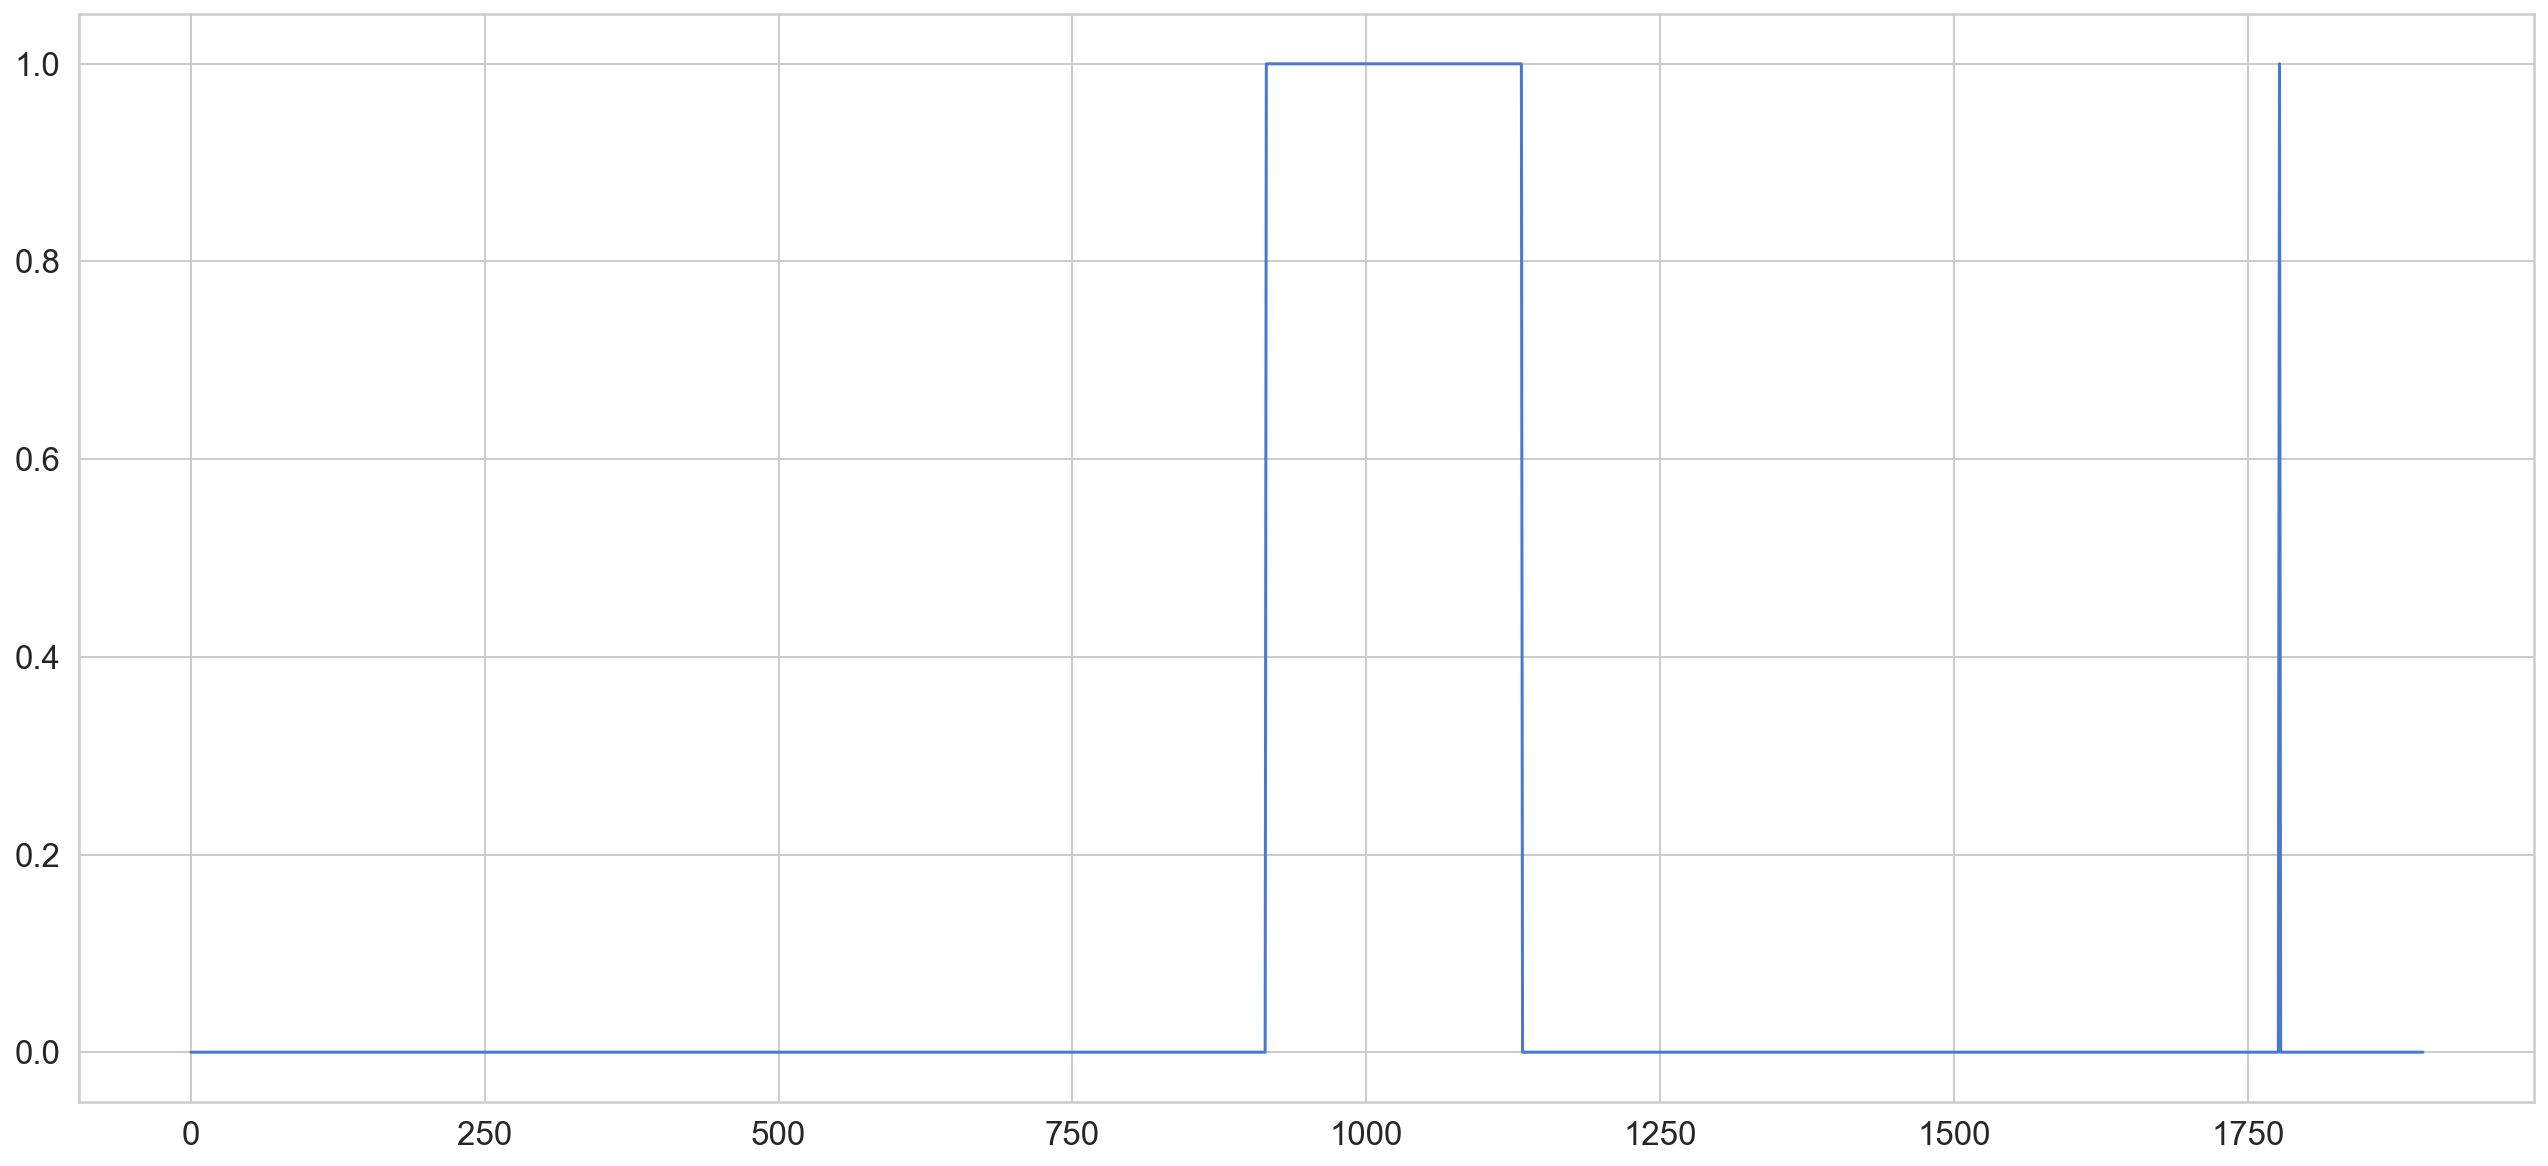

In [70]:
test_cnn = create_dataset_cnn(test,TIME_STEPS)
pre = model_cnn.predict(test_cnn)
re = pre.argmax(axis = 1)
print(np.where(re==1))
plt.plot(re)

In [68]:
reconstructions_test = model.predict(test[..., np.newaxis])
test_mae = np.mean(np.abs(reconstructions_test - test[..., np.newaxis]), axis=1)

63/63 [==============================] - 0s 3ms/step


In [71]:
test_df = pd.DataFrame(index = np.arange(len(test_mae)-TIME_STEPS))
test_df["loss"] = test_mae[:len(test)-TIME_STEPS]
test_df["cnn_predict"] = re
test_df["higher_threshold"] = THRESHOLD_HIGH
test_df["lower_threshold"] = THRESHOLD_LOW
test_df["anomaly"] = np.where(
    (test_df.loss > test_df.higher_threshold) | (test_df.loss < test_df.lower_threshold) & (test_df.cnn_predict == 1),
    True,
    False
)
test_df["signal"] = test[:len(test)-TIME_STEPS]

In [72]:
test_df

,loss,cnn_predict,higher_threshold,lower_threshold,anomaly,signal
0,0.002466,0,0.002779,0.002081,False,0.003391
1,0.002480,0,0.002779,0.002081,False,0.004706
2,0.002463,0,0.002779,0.002081,False,0.003062
3,0.002459,0,0.002779,0.002081,False,0.002733
4,0.002452,0,0.002779,0.002081,False,0.002076
...,...,...,...,...,...,...
1895,0.002459,0,0.002779,0.002081,False,0.002733
1896,0.002456,0,0.002779,0.002081,False,0.002404
1897,0.002473,0,0.002779,0.002081,False,0.004049
1898,0.002480,0,0.002779,0.002081,False,0.004706


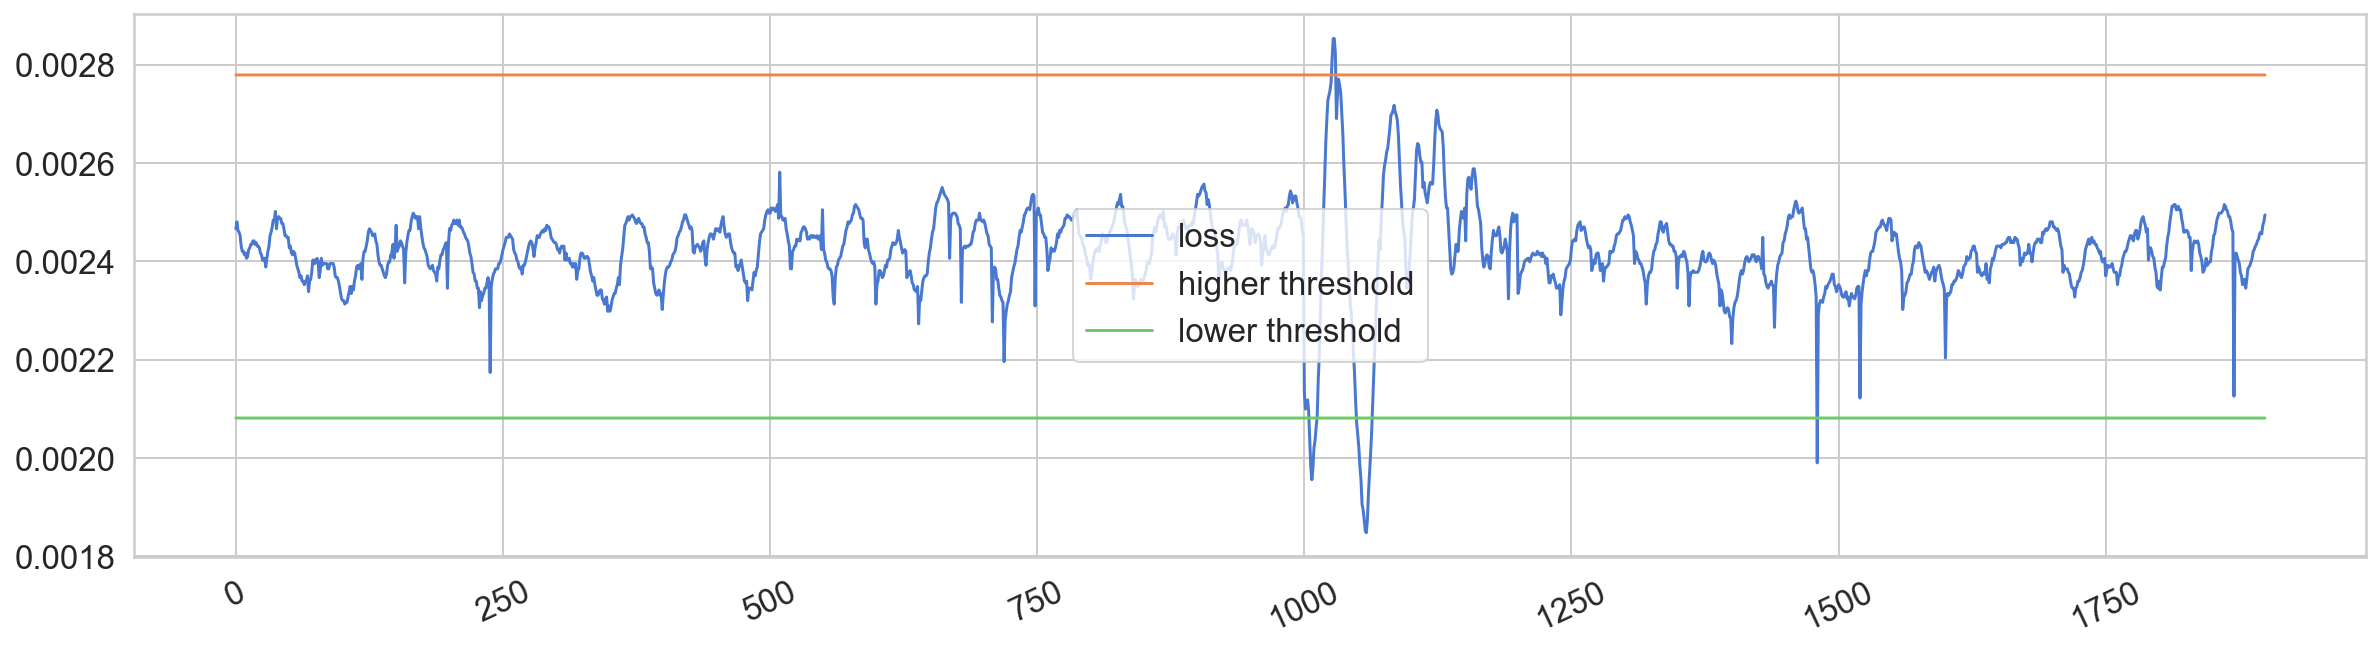

In [73]:
plt.figure(figsize=(20,5))
plt.plot(test_df.index, test_df.loss, label='loss')
plt.plot(test_df.index, test_df.higher_threshold, label='higher threshold')
plt.plot(test_df.index, test_df.lower_threshold, label='lower threshold')
plt.xticks(rotation=25)
plt.legend()

In [77]:
anomalies = test_df[test_df.anomaly == True]
anomalies

,loss,cnn_predict,higher_threshold,lower_threshold,anomaly,signal
1005,0.002040,1,0.002779,0.002081,True,-0.035084
1006,0.001983,1,0.002779,0.002081,True,-0.040017
1007,0.001956,1,0.002779,0.002081,True,-0.042319
1008,0.001979,1,0.002779,0.002081,True,-0.040346
1009,0.002021,1,0.002779,0.002081,True,-0.036728
1010,0.002036,1,0.002779,0.002081,True,-0.035413
1011,0.002062,1,0.002779,0.002081,True,-0.033111
1026,0.002814,1,0.002779,0.002081,True,0.036933
1027,0.002853,1,0.002779,0.002081,True,0.040880
1028,0.002853,1,0.002779,0.002081,True,0.040880


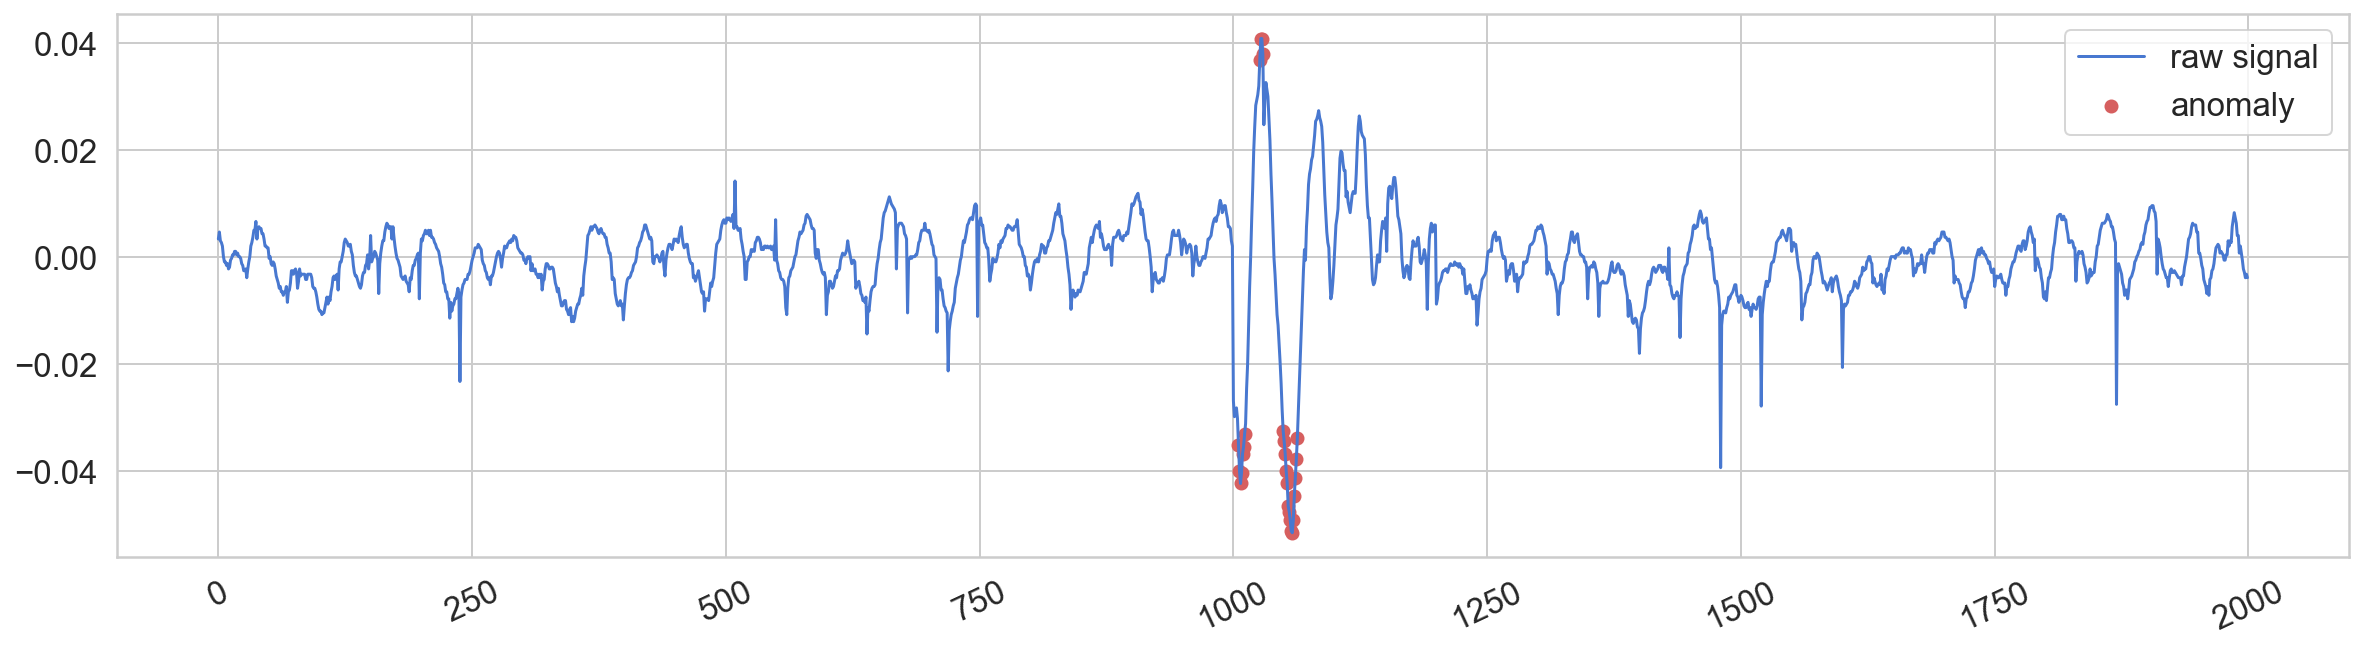

In [76]:
plt.figure(figsize=(20,5))
plt.plot( 
  test, 
  label='raw signal'
)

plt.scatter(
  anomalies.index,
  anomalies.signal,
  color=sns.color_palette()[3],
  label='anomaly'
)
plt.xticks(rotation=25)
plt.legend()

### Test 3: Ball Fault

In [78]:
kbth = scipy.io.loadmat('Data/ball_fault/B-D-1.mat')

In [83]:
test = data2[7000:9000]
test[1000:1100] = kbth["Channel_1"][2100:2200]

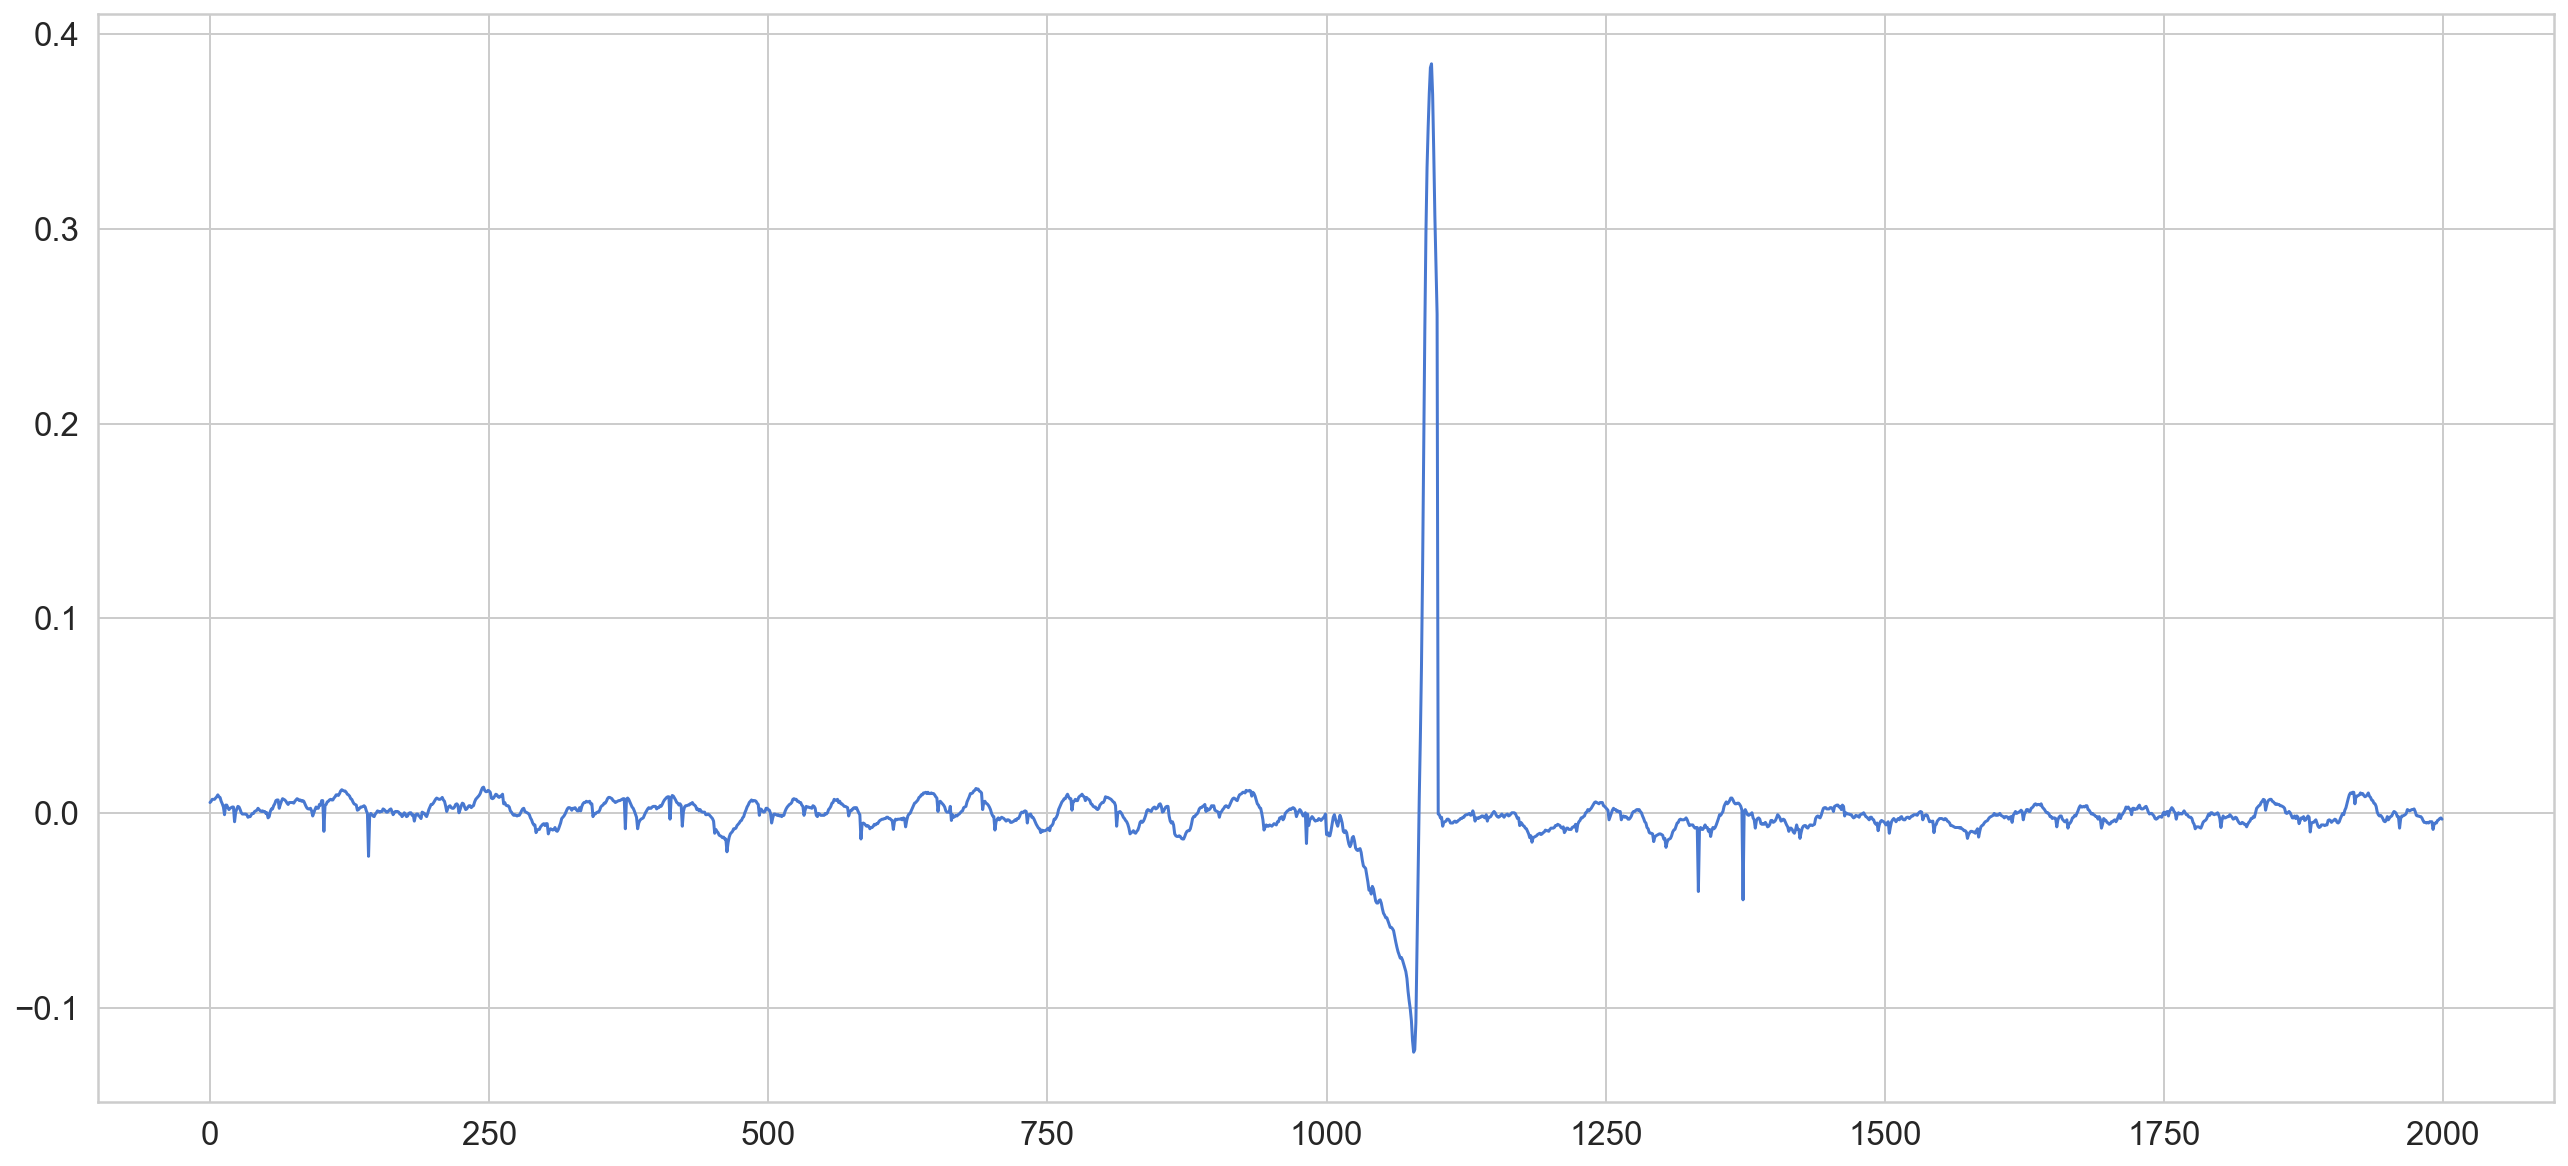

In [84]:
plt.plot(test)

60/60 [==============================] - 0s 7ms/step
(array([ 216,  217,  218,  220,  224,  225,  226,  228,  232,  233,  234,
        236,  240,  241,  242,  243,  244,  245,  246,  247,  248,  249,
        250,  251,  252,  253,  747,  932,  933,  934,  935,  936,  937,
        938,  939,  940,  941,  942,  943,  944,  945,  946,  947,  948,
        949,  950,  951,  952,  953,  954,  955,  956,  957,  958,  959,
        960,  961,  962,  963,  964,  965,  966,  967,  968,  969,  970,
        971,  972,  973,  974,  975,  976,  977,  978,  979,  980,  981,
        982,  983,  984,  985,  986,  987,  988,  989,  990,  991,  992,
        993,  994,  995,  996,  997,  998,  999, 1000, 1001, 1002, 1003,
       1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013, 1014,
       1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1025,
       1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036,
       1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 104

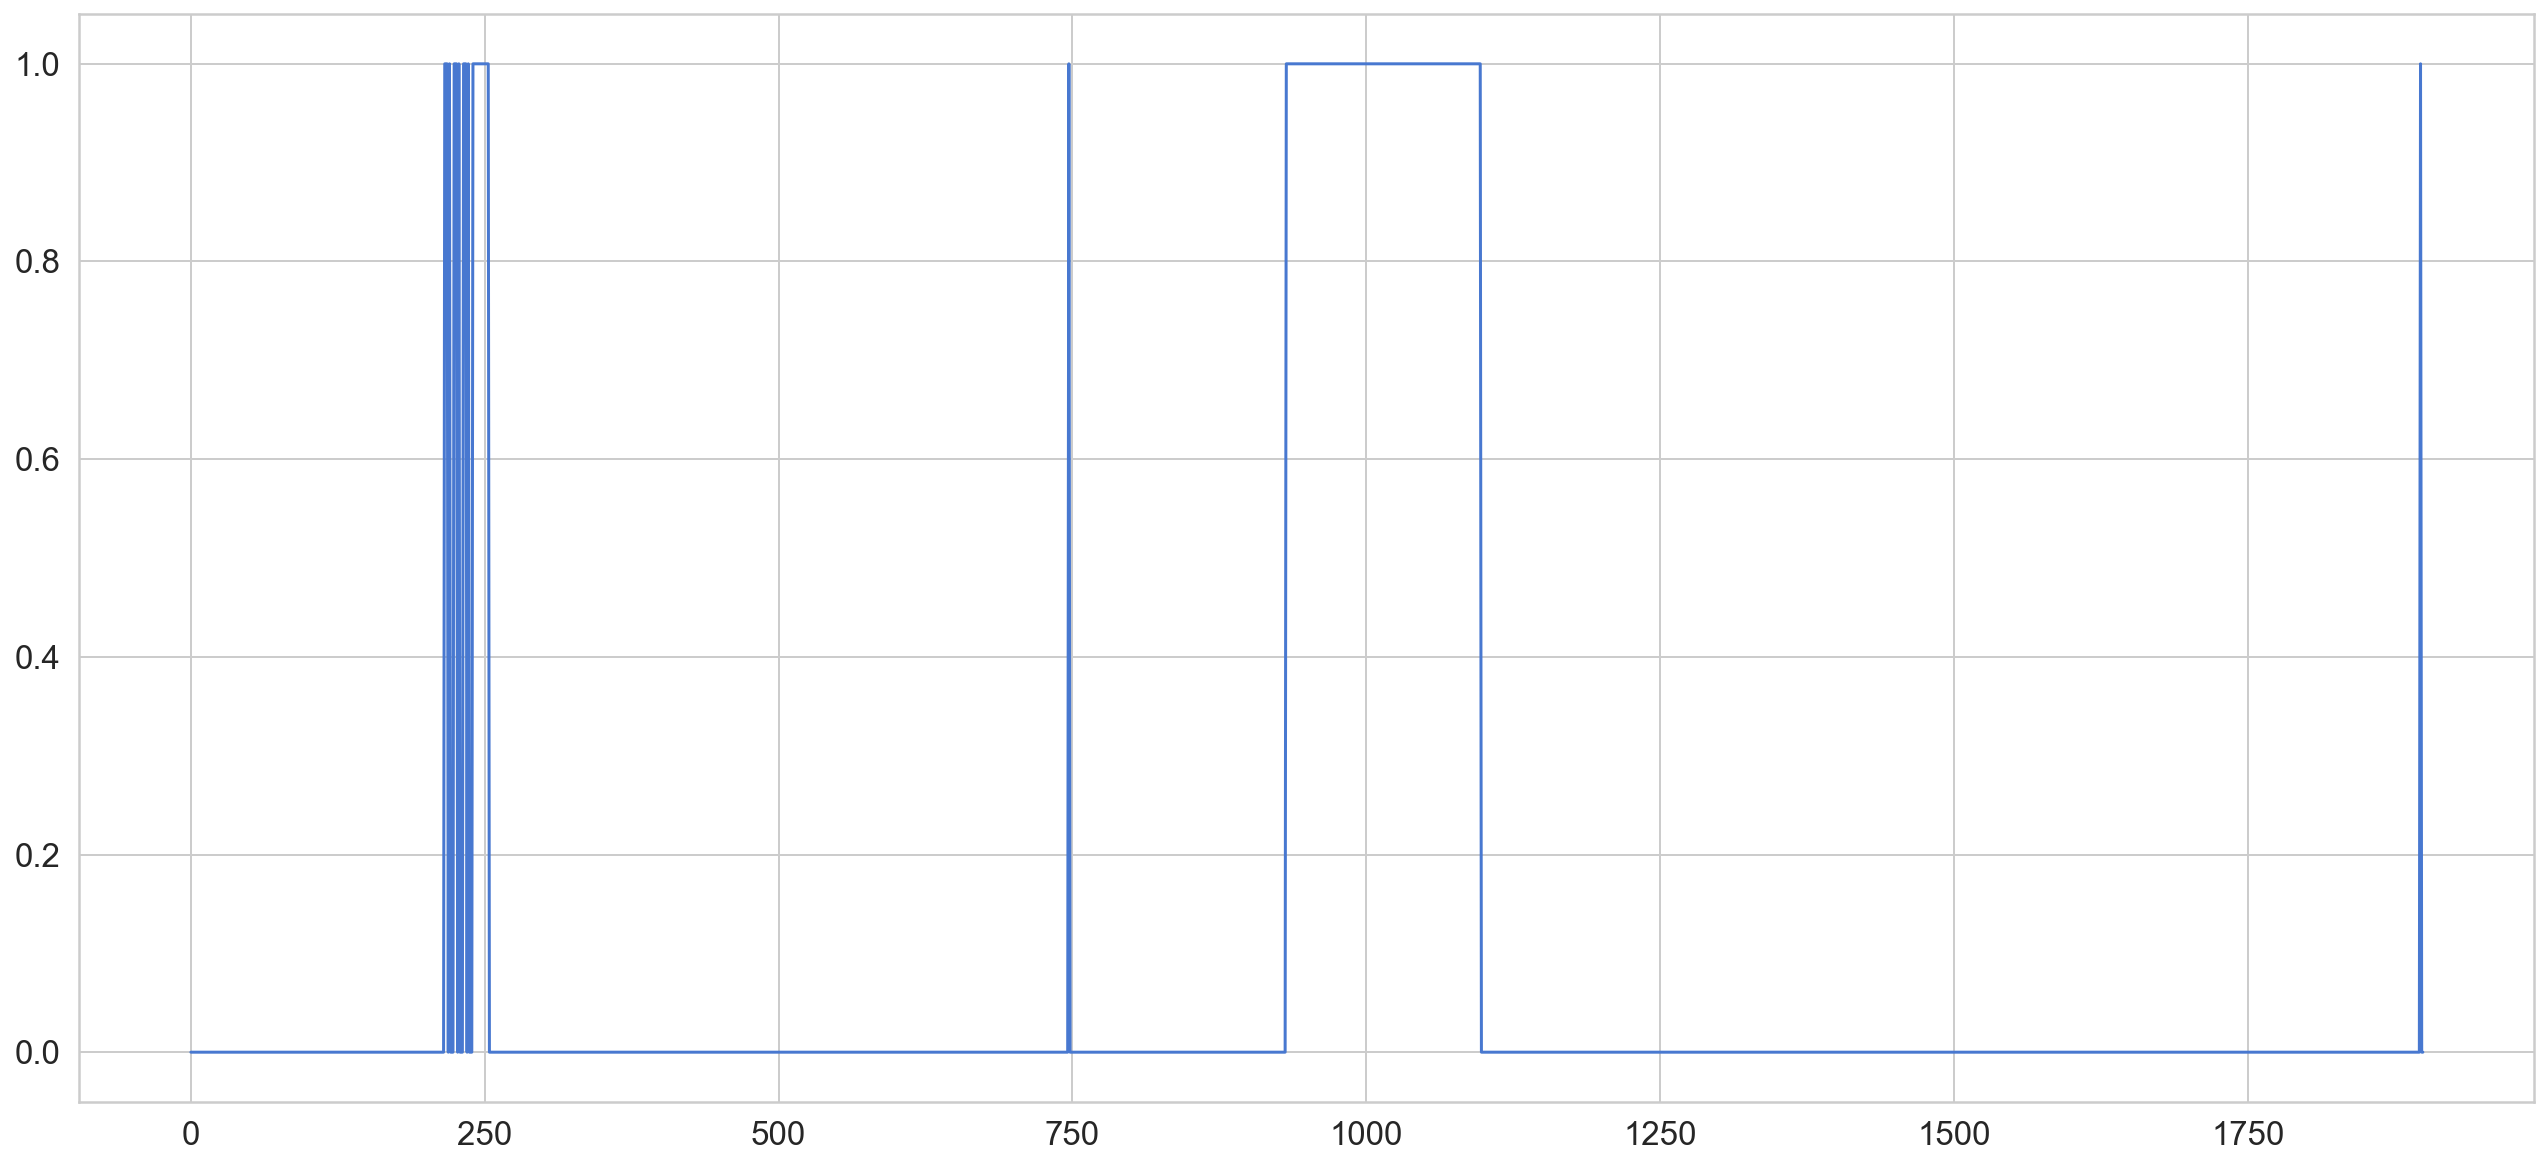

In [85]:
test_cnn = create_dataset_cnn(test,TIME_STEPS)
pre = model_cnn.predict(test_cnn)
re = pre.argmax(axis = 1)
print(np.where(re==1))
plt.plot(re)

In [86]:
reconstructions_test = model.predict(test[..., np.newaxis])
test_mae = np.mean(np.abs(reconstructions_test - test[..., np.newaxis]), axis=1)

63/63 [==============================] - 0s 5ms/step


In [87]:
test_df = pd.DataFrame(index = np.arange(len(test_mae)-TIME_STEPS))
test_df["loss"] = test_mae[:len(test)-TIME_STEPS]
test_df["cnn_predict"] = re
test_df["higher_threshold"] = THRESHOLD_HIGH
test_df["lower_threshold"] = THRESHOLD_LOW
test_df["anomaly"] = np.where(
    (test_df.loss > test_df.higher_threshold) | (test_df.loss < test_df.lower_threshold) & (test_df.cnn_predict == 1),
    True,
    False
)
test_df["signal"] = test[:len(test)-TIME_STEPS]

In [88]:
test_df

,loss,cnn_predict,higher_threshold,lower_threshold,anomaly,signal
0,0.002487,0,0.002779,0.002081,False,0.005364
1,0.002494,0,0.002779,0.002081,False,0.006022
2,0.002505,0,0.002779,0.002081,False,0.007008
3,0.002505,0,0.002779,0.002081,False,0.007008
4,0.002505,0,0.002779,0.002081,False,0.007008
...,...,...,...,...,...,...
1895,0.002363,0,0.002779,0.002081,False,-0.006146
1896,0.002363,0,0.002779,0.002081,False,-0.006146
1897,0.002388,1,0.002779,0.002081,False,-0.003844
1898,0.002392,0,0.002779,0.002081,False,-0.003515


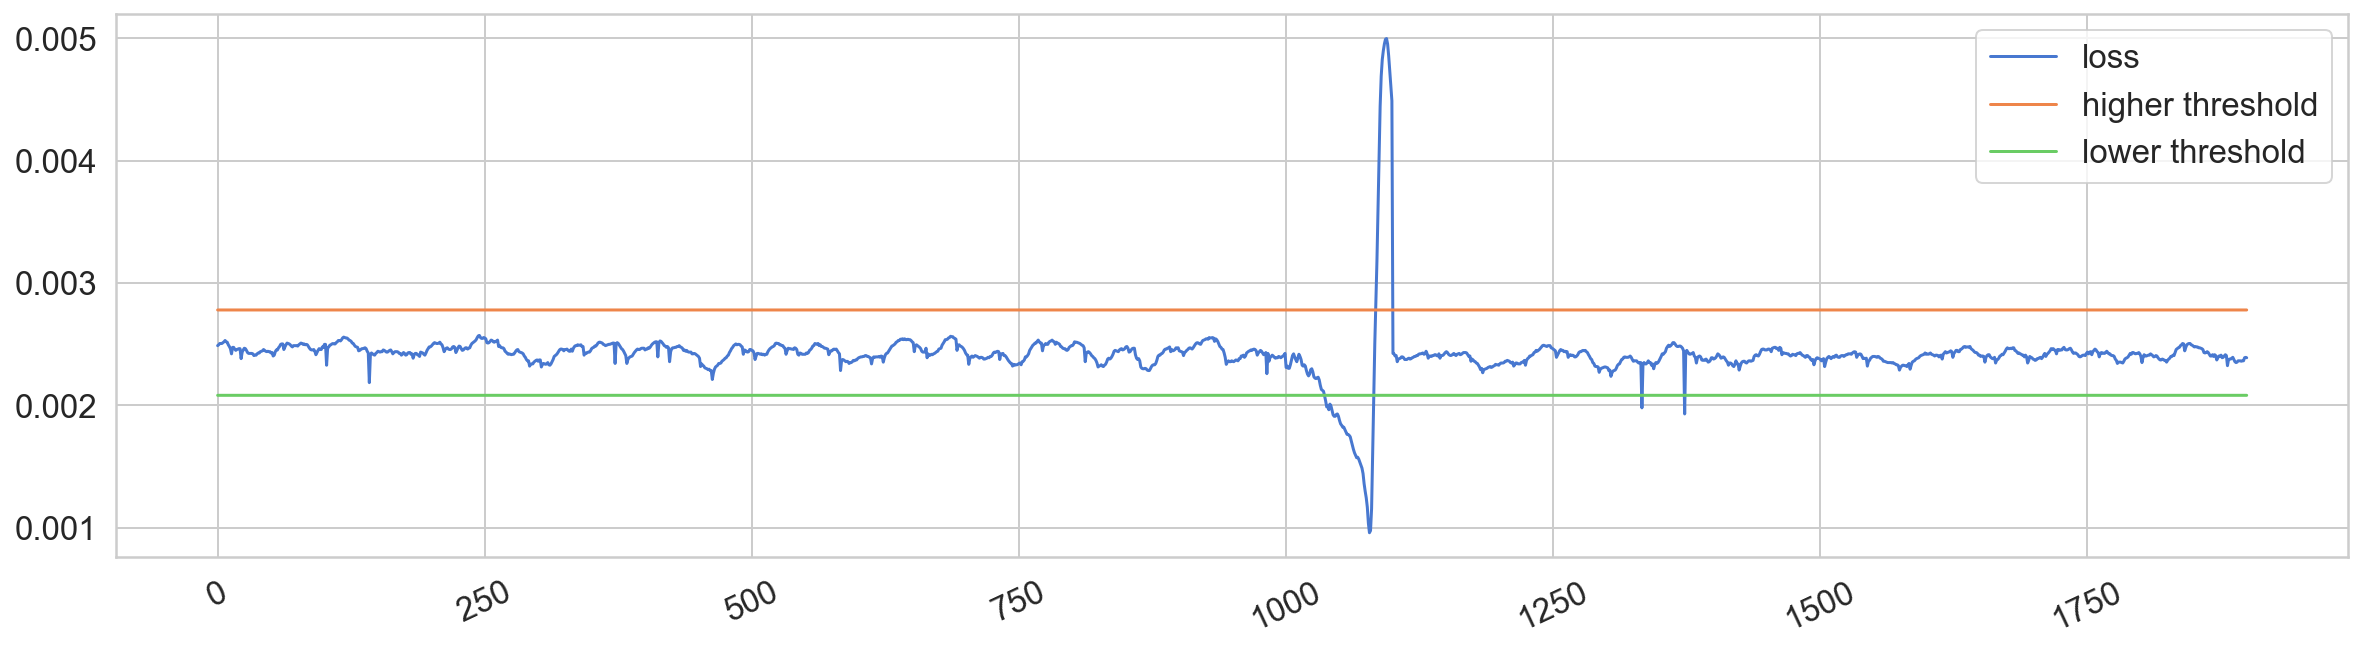

In [89]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.plot(test_df.index, test_df.loss, label='loss')
plt.plot(test_df.index, test_df.higher_threshold, label='higher threshold')
plt.plot(test_df.index, test_df.lower_threshold, label='lower threshold')
plt.xticks(rotation=25)
plt.legend()

In [90]:
anomalies = test_df[test_df.anomaly == True]
anomalies

,loss,cnn_predict,higher_threshold,lower_threshold,anomaly,signal
1036,0.002077,1,0.002779,0.002081,True,-0.031796
1037,0.002036,1,0.002779,0.002081,True,-0.035413
1038,0.001987,1,0.002779,0.002081,True,-0.039688
1039,0.001994,1,0.002779,0.002081,True,-0.039030
1040,0.001964,1,0.002779,0.002081,True,-0.041661
...,...,...,...,...,...,...
1095,0.004951,1,0.002779,0.002081,True,0.369069
1096,0.004854,1,0.002779,0.002081,True,0.339473
1097,0.004726,1,0.002779,0.002081,True,0.306588
1098,0.004611,0,0.002779,0.002081,True,0.280938


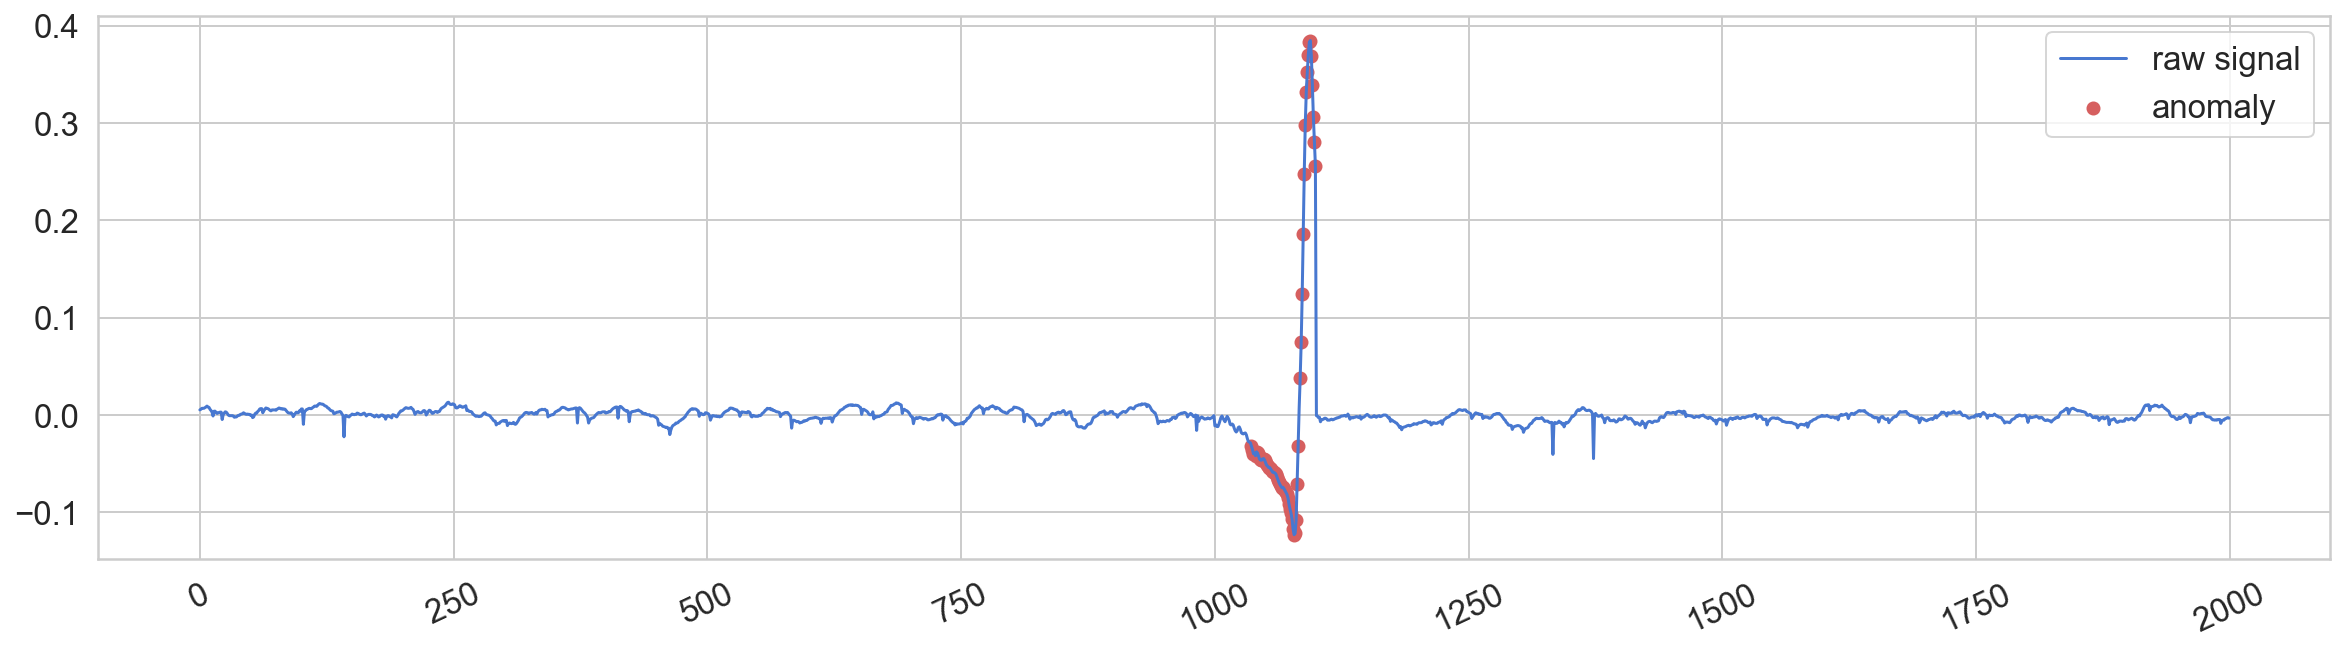

In [91]:
plt.figure(figsize=(20,5))
plt.plot(
  test, 
  label='raw signal'
)

plt.scatter(
  anomalies.index,
  anomalies.signal,
  color=sns.color_palette()[3],
  label='anomaly'
)
plt.xticks(rotation=25)
plt.legend()

### Test 4: Combine Fault

In [92]:
kbth = scipy.io.loadmat('Data/combine_fault/C-B-1.mat')

In [93]:
test = data2[7000:9000]
test[1000:1200] = kbth["Channel_1"][2000:2200]

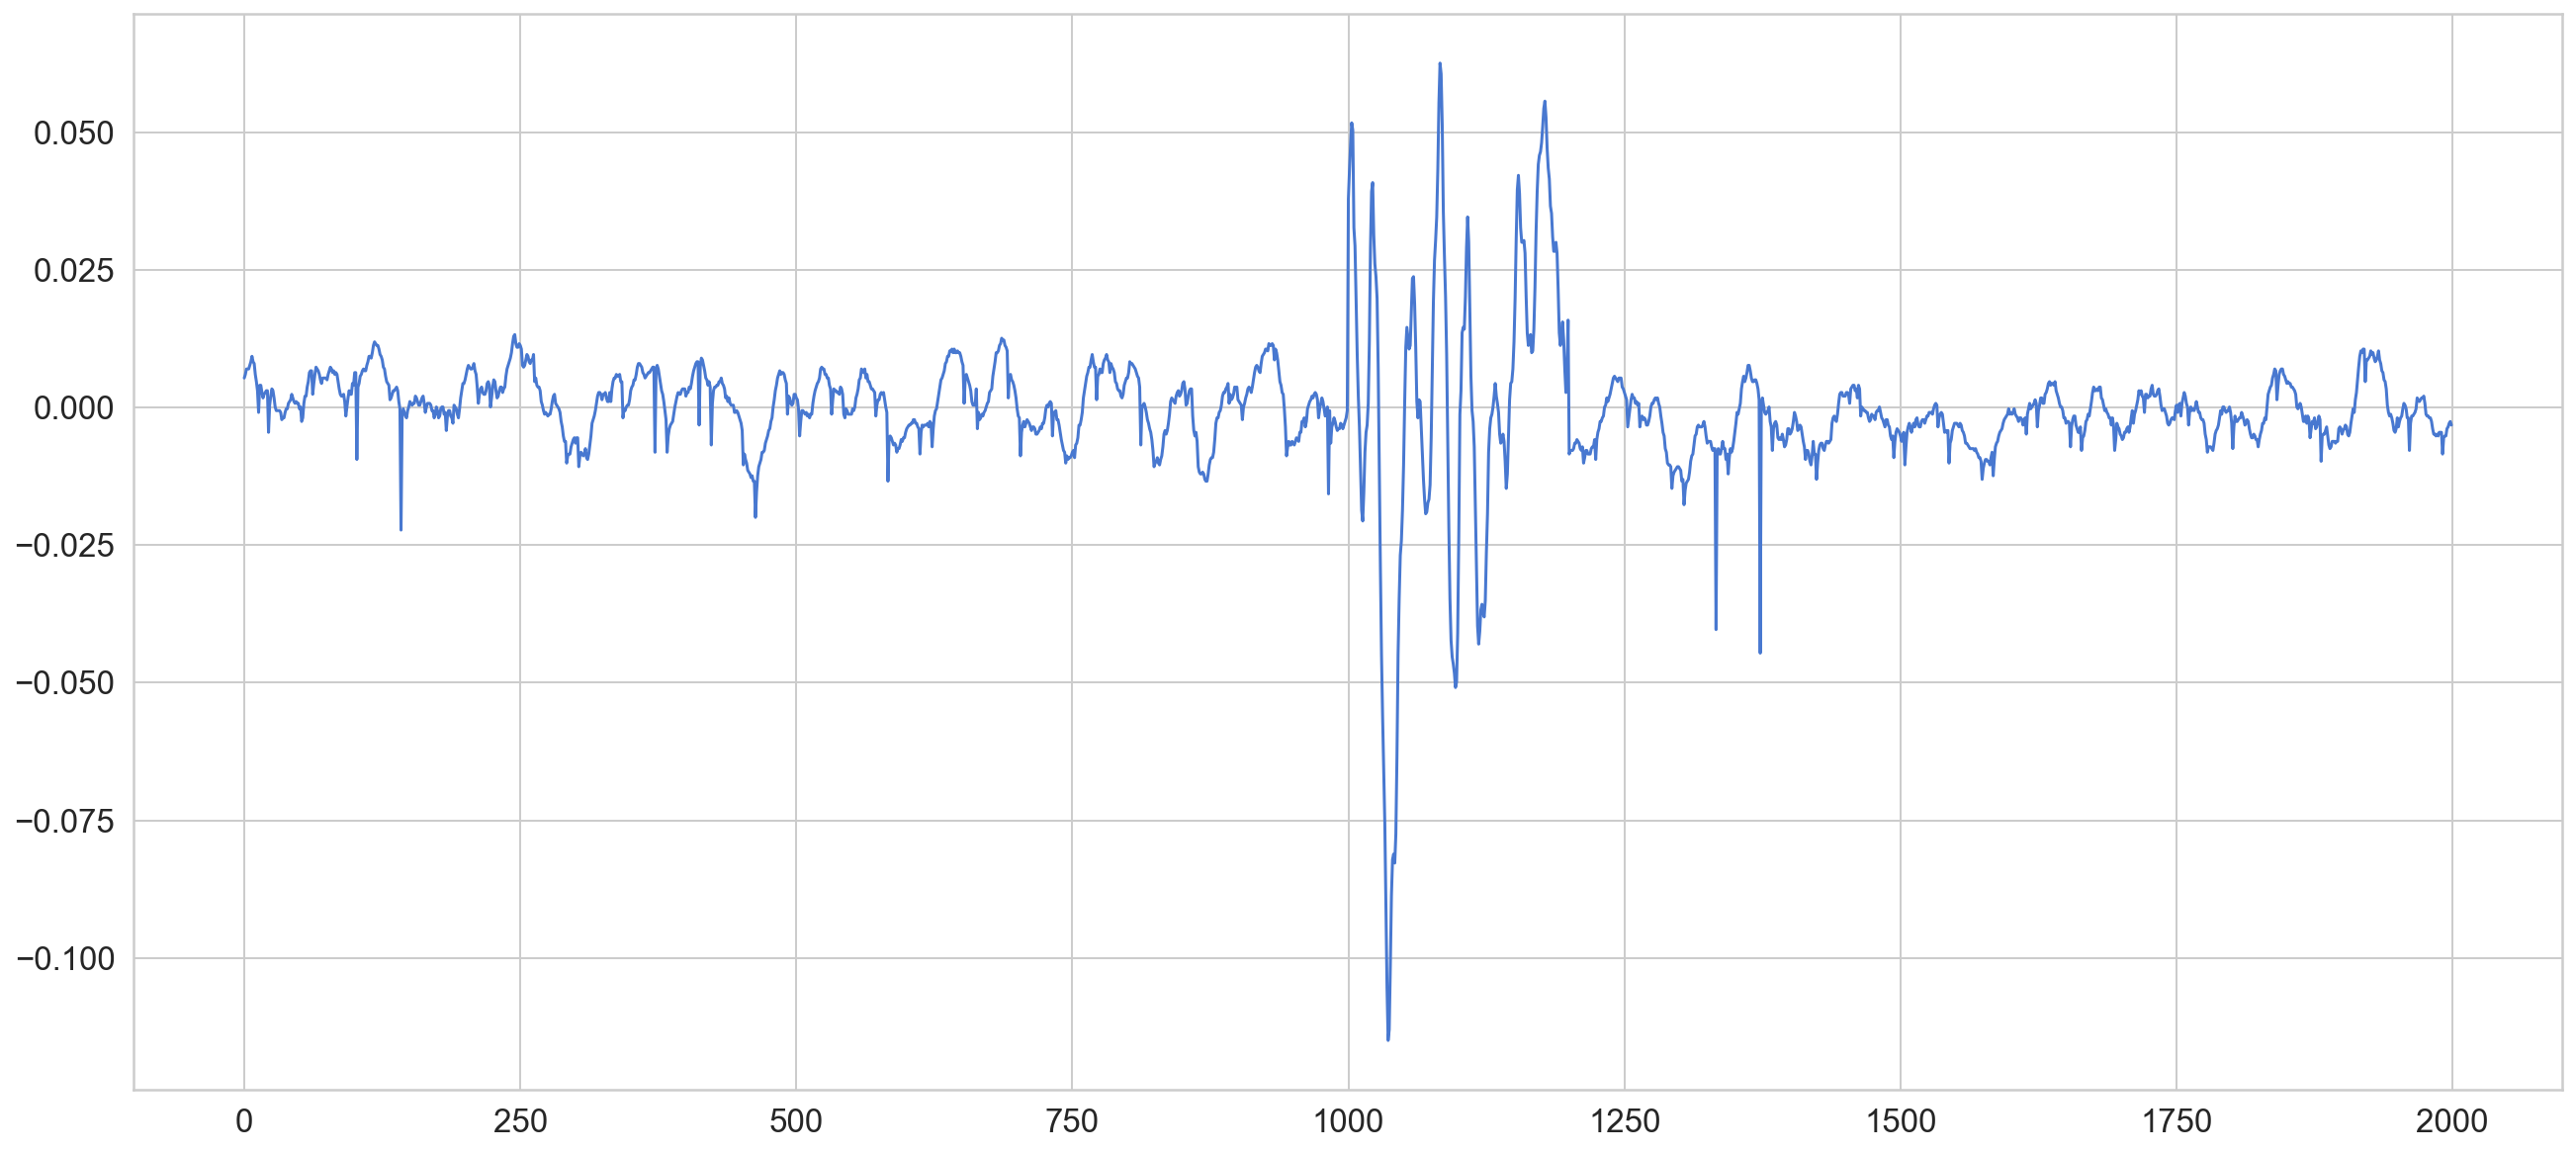

In [94]:
plt.plot(test)

60/60 [==============================] - 0s 7ms/step
(array([ 216,  217,  218,  220,  224,  225,  226,  228,  232,  233,  234,
        236,  240,  241,  242,  243,  244,  245,  246,  247,  248,  249,
        250,  251,  252,  253,  747,  906,  907,  908,  909,  910,  911,
        912,  913,  914,  915,  916,  917,  918,  919,  920,  921,  922,
        923,  924,  925,  926,  927,  928,  929,  930,  931,  932,  933,
        934,  935,  936,  937,  938,  939,  940,  941,  942,  943,  944,
        945,  946,  947,  948,  949,  950,  951,  952,  953,  954,  955,
        956,  957,  958,  959,  960,  961,  962,  963,  964,  965,  966,
        967,  968,  969,  970,  971,  972,  973,  974,  975,  976,  977,
        978,  979,  980,  981,  982,  983,  984,  985,  986,  987,  988,
        989,  990,  991,  992,  993,  994,  995,  996,  997,  998,  999,
       1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010,
       1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 102

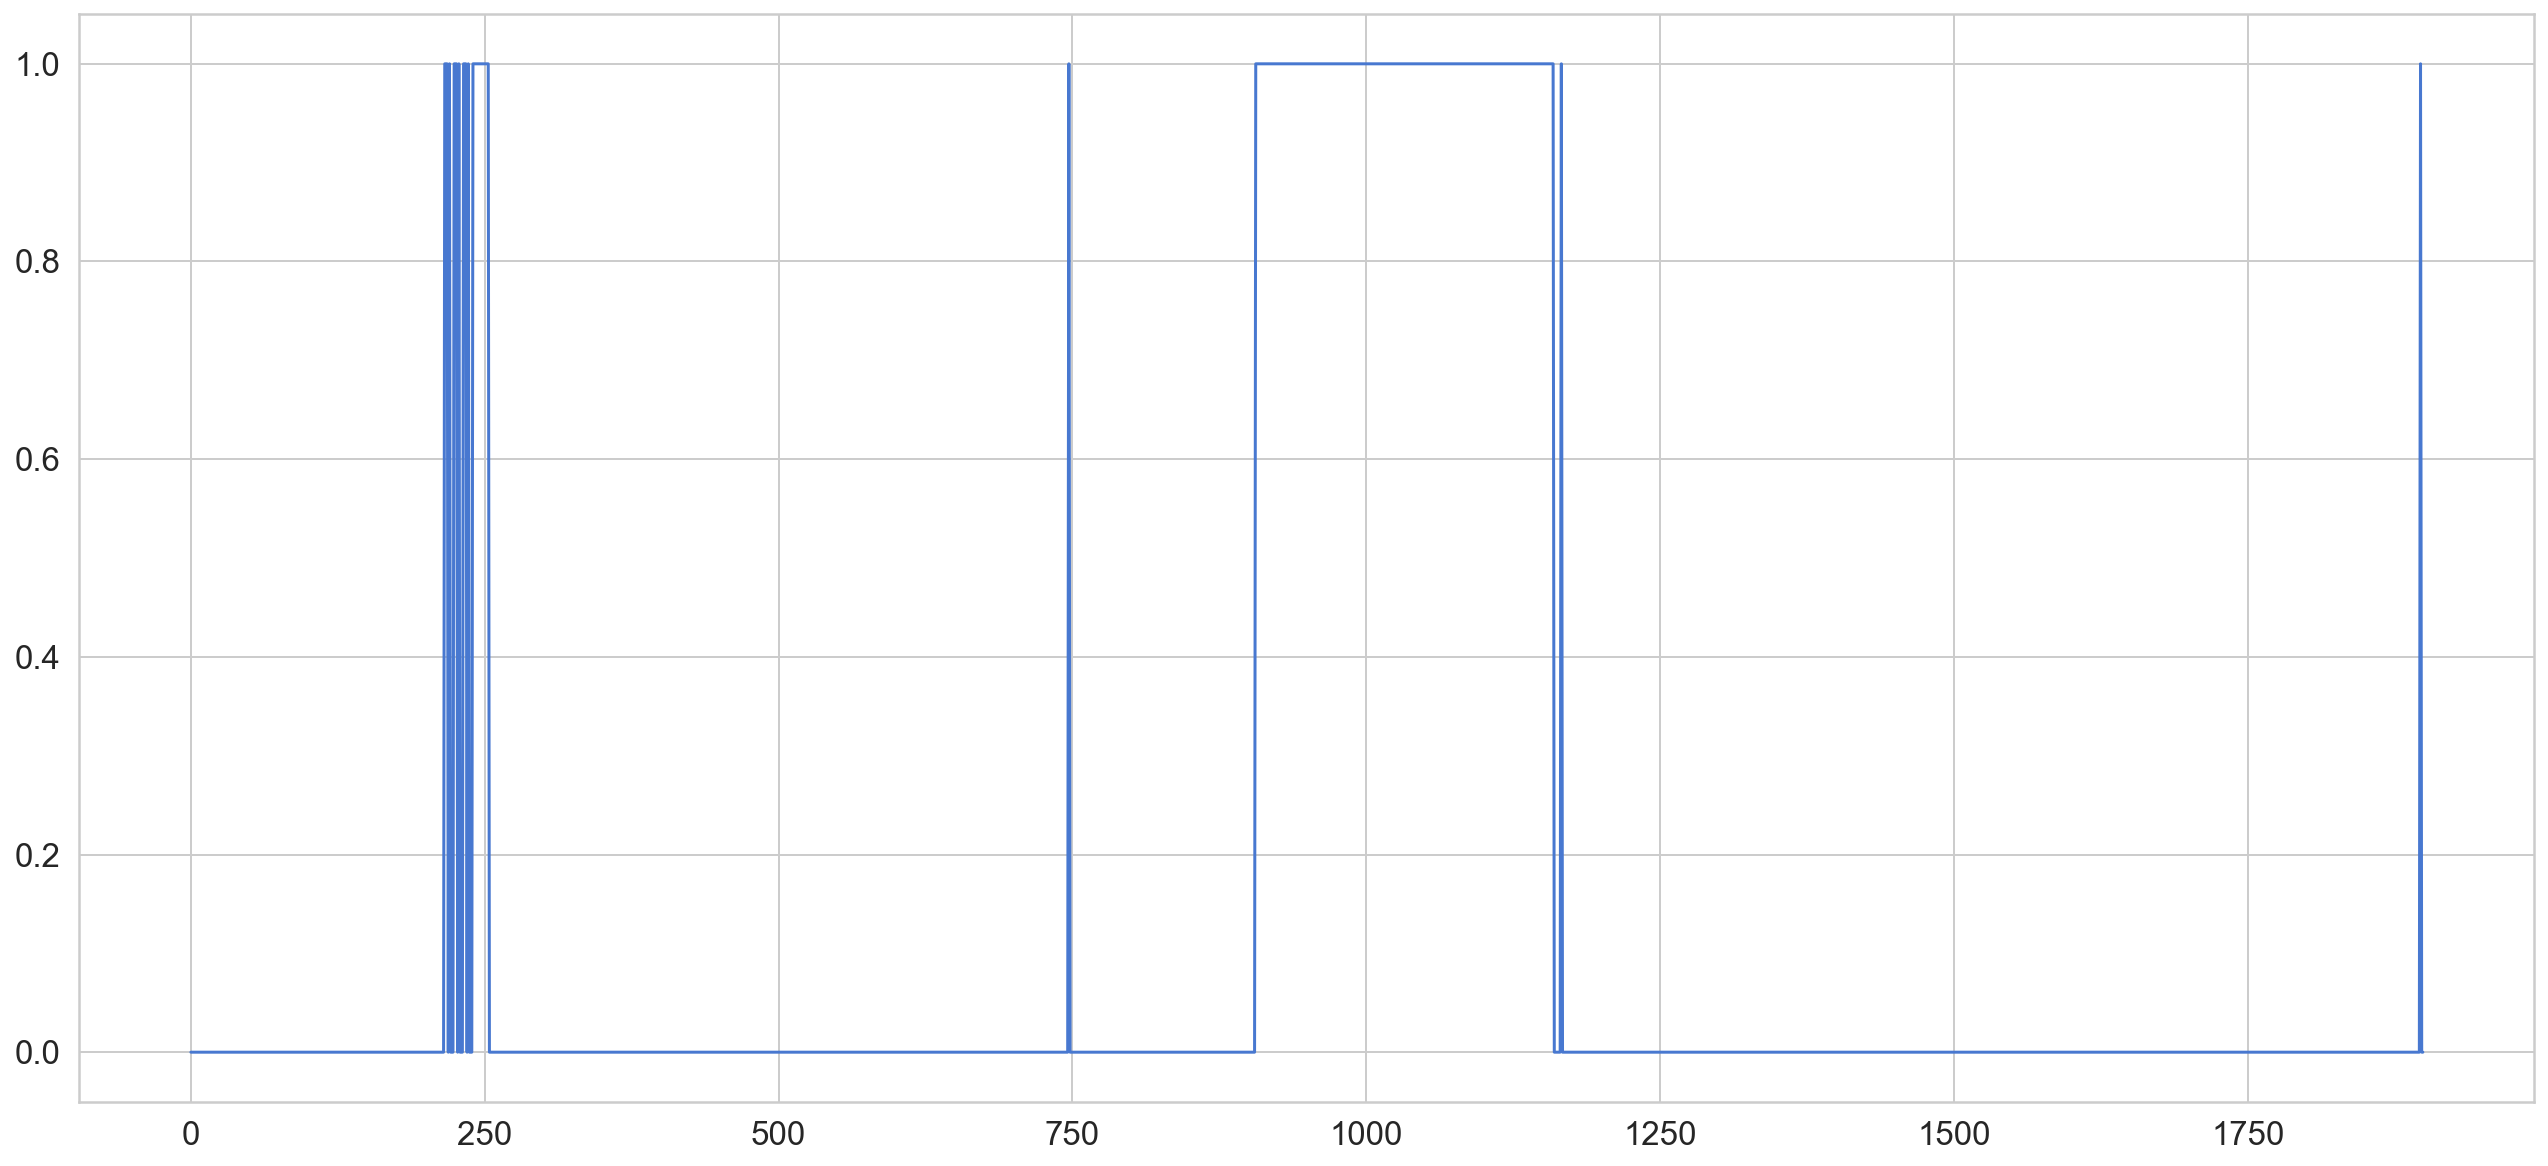

In [95]:
test_cnn = create_dataset_cnn(test,TIME_STEPS)
pre = model_cnn.predict(test_cnn)
re = pre.argmax(axis = 1)
print(np.where(re==1))
plt.plot(re)

In [96]:
reconstructions_test = model.predict(test[..., np.newaxis])
test_mae = np.mean(np.abs(reconstructions_test - test[..., np.newaxis]), axis=1)

63/63 [==============================] - 0s 3ms/step


In [97]:
test_df = pd.DataFrame(index = np.arange(len(test_mae)-TIME_STEPS))
test_df["loss"] = test_mae[:len(test)-TIME_STEPS]
test_df["cnn_predict"] = re
test_df["higher_threshold"] = THRESHOLD_HIGH
test_df["lower_threshold"] = THRESHOLD_LOW
test_df["anomaly"] = np.where(
    (test_df.loss > test_df.higher_threshold) | (test_df.loss < test_df.lower_threshold) & (test_df.cnn_predict == 1),
    True,
    False
)
test_df["signal"] = test[:len(test)-TIME_STEPS]

In [98]:
test_df

,loss,cnn_predict,higher_threshold,lower_threshold,anomaly,signal
0,0.002487,0,0.002779,0.002081,False,0.005364
1,0.002494,0,0.002779,0.002081,False,0.006022
2,0.002505,0,0.002779,0.002081,False,0.007008
3,0.002505,0,0.002779,0.002081,False,0.007008
4,0.002505,0,0.002779,0.002081,False,0.007008
...,...,...,...,...,...,...
1895,0.002363,0,0.002779,0.002081,False,-0.006146
1896,0.002363,0,0.002779,0.002081,False,-0.006146
1897,0.002388,1,0.002779,0.002081,False,-0.003844
1898,0.002392,0,0.002779,0.002081,False,-0.003515


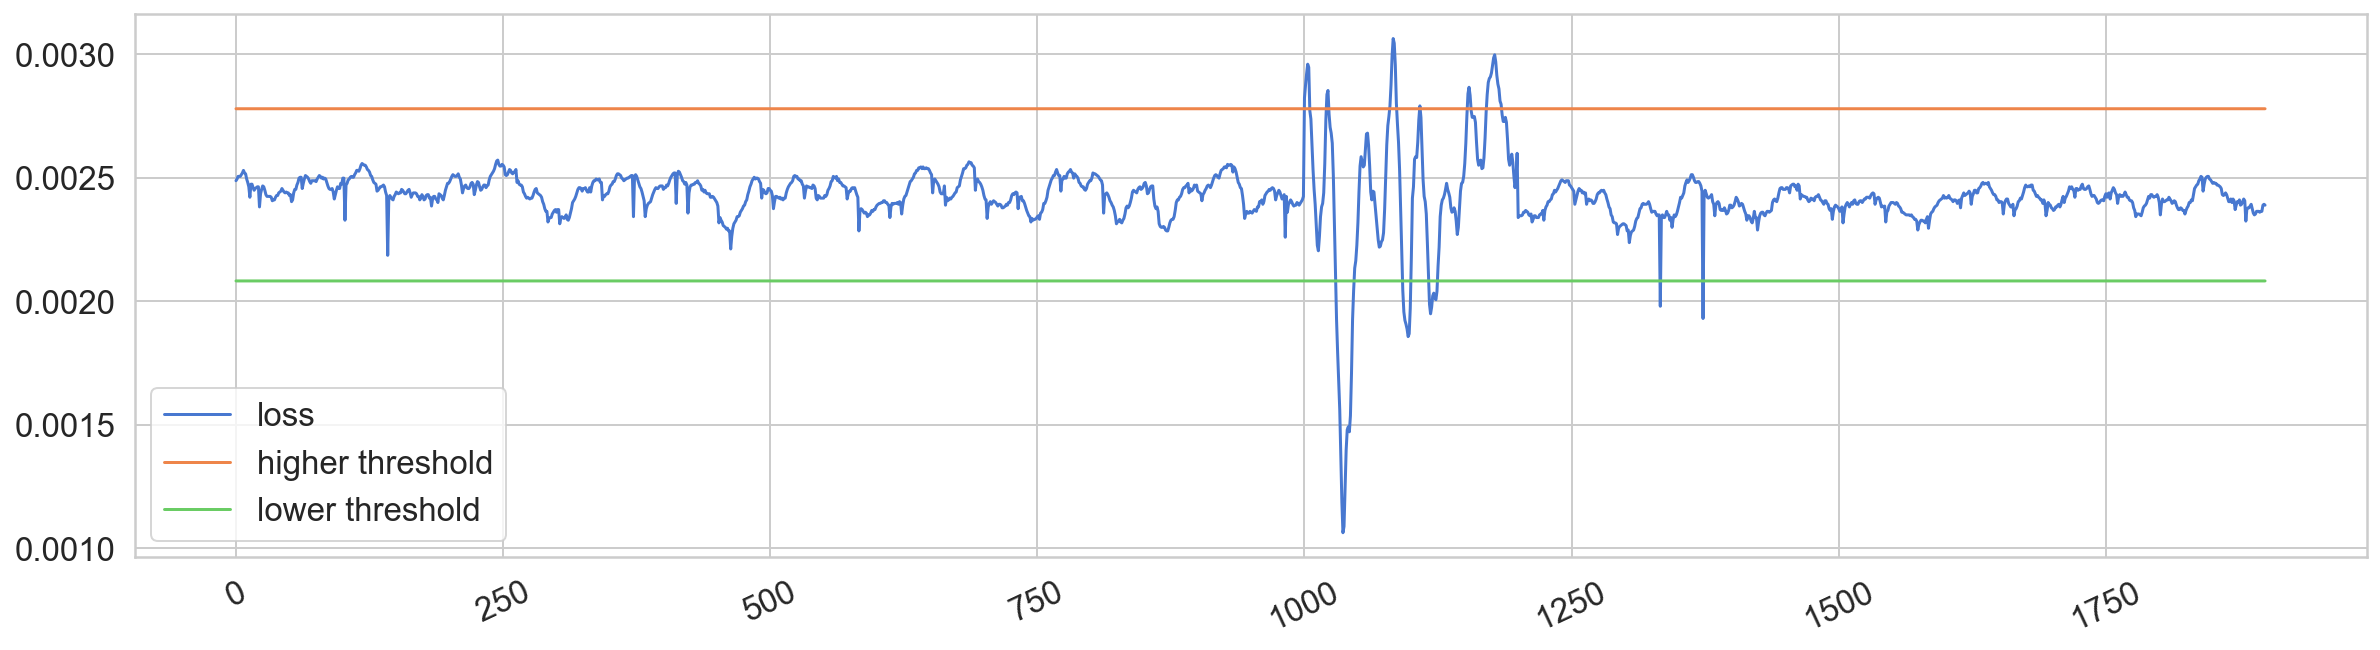

In [99]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.plot(test_df.index, test_df.loss, label='loss')
plt.plot(test_df.index, test_df.higher_threshold, label='higher threshold')
plt.plot(test_df.index, test_df.lower_threshold, label='lower threshold')
plt.xticks(rotation=25)
plt.legend()

In [100]:
anomalies = test_df[test_df.anomaly == True]
anomalies

,loss,cnn_predict,higher_threshold,lower_threshold,anomaly,signal
1000,0.002823,1,0.002779,0.002081,True,0.037920
1001,0.002876,1,0.002779,0.002081,True,0.043181
1002,0.002921,1,0.002779,0.002081,True,0.047785
1003,0.002959,1,0.002779,0.002081,True,0.051731
1004,0.002947,1,0.002779,0.002081,True,0.050416
...,...,...,...,...,...,...
1180,0.002914,0,0.002779,0.002081,True,0.047128
1181,0.002879,0,0.002779,0.002081,True,0.043510
1182,0.002859,0,0.002779,0.002081,True,0.041537
1183,0.002810,0,0.002779,0.002081,True,0.036605


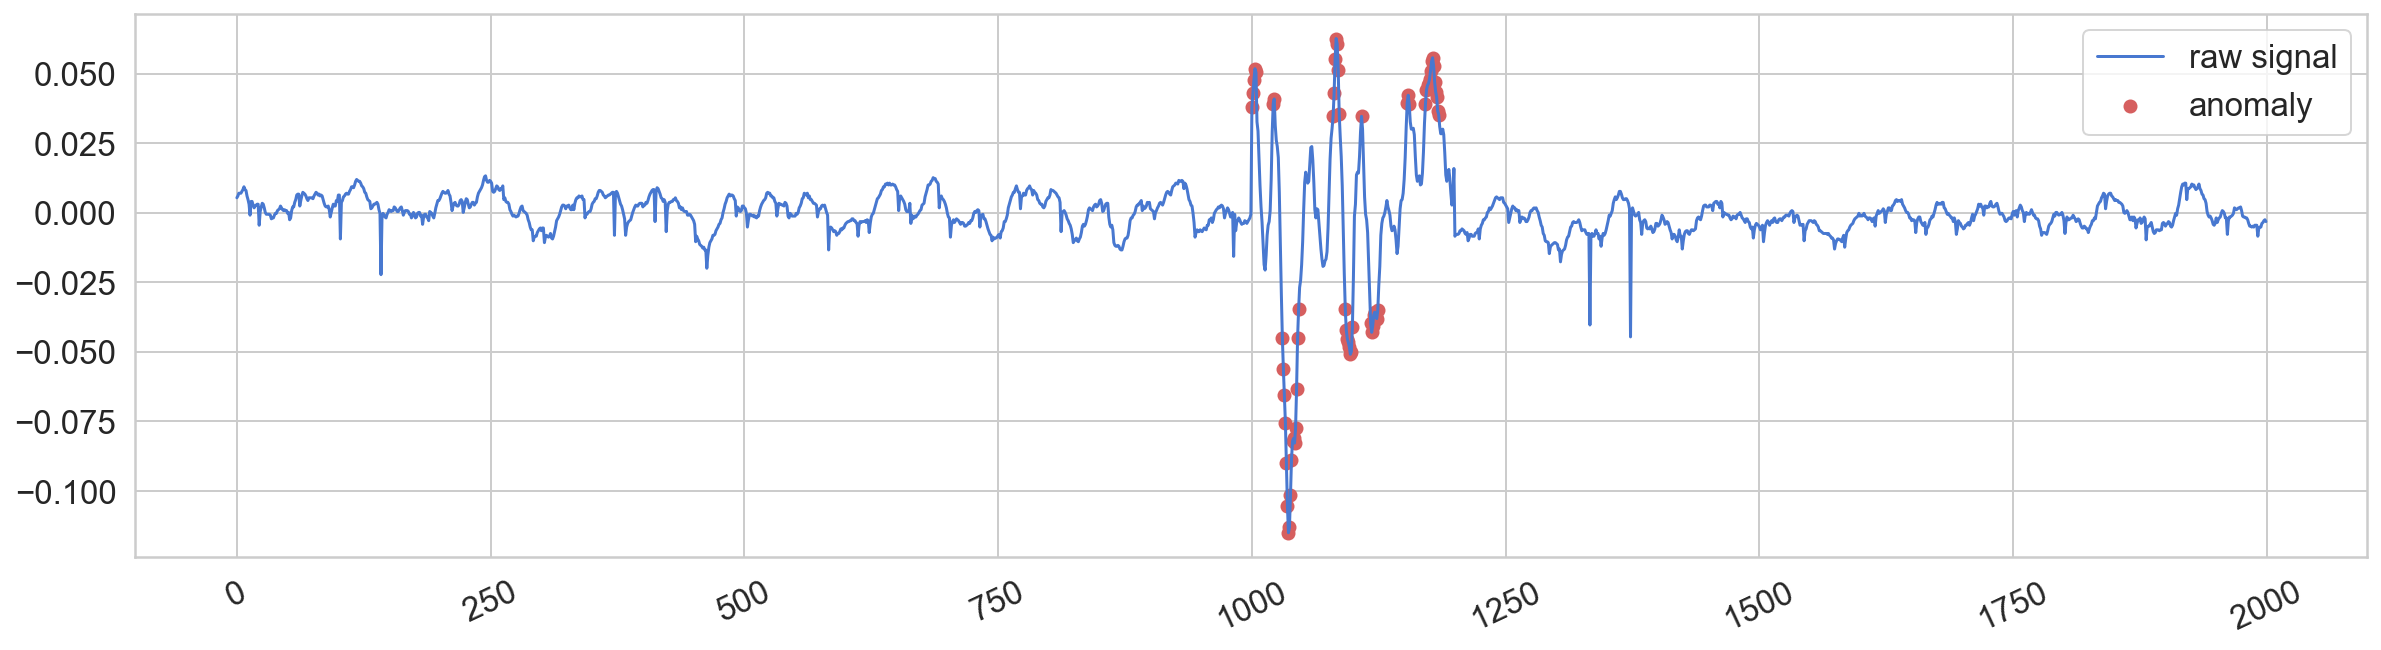

In [101]:
plt.figure(figsize=(20,5))
plt.plot( 
  test, 
  label='raw signal'
)

plt.scatter(
  anomalies.index,
  anomalies.signal,
  color=sns.color_palette()[3],
  label='anomaly'
)
plt.xticks(rotation=25)
plt.legend()